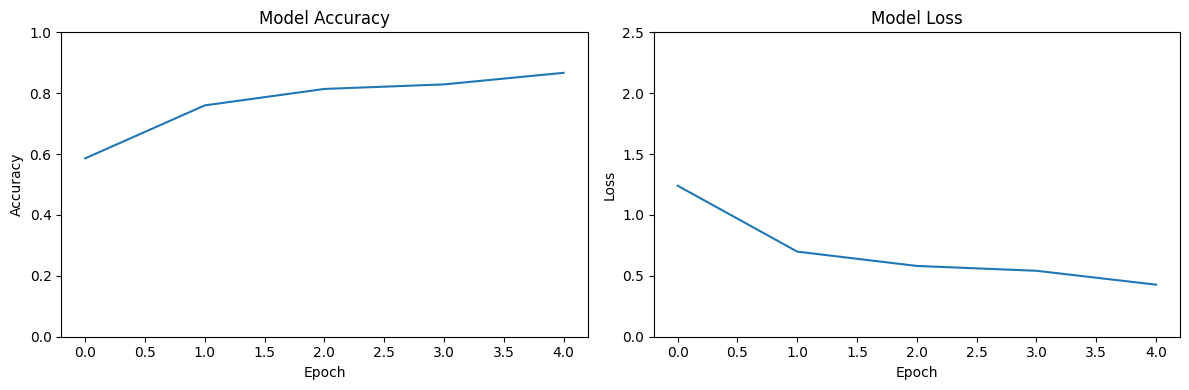

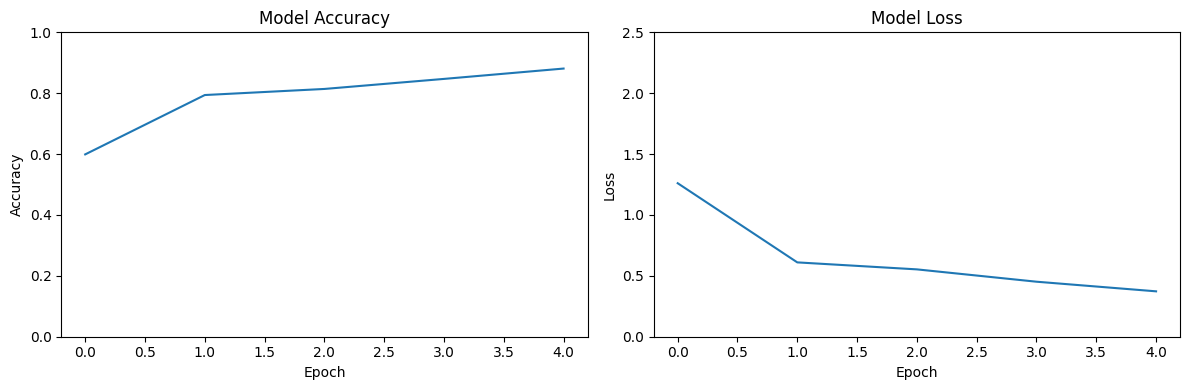

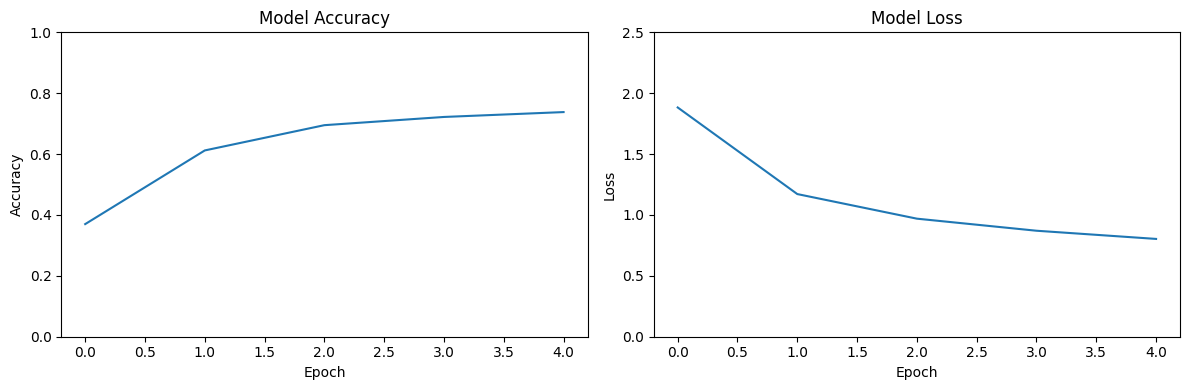

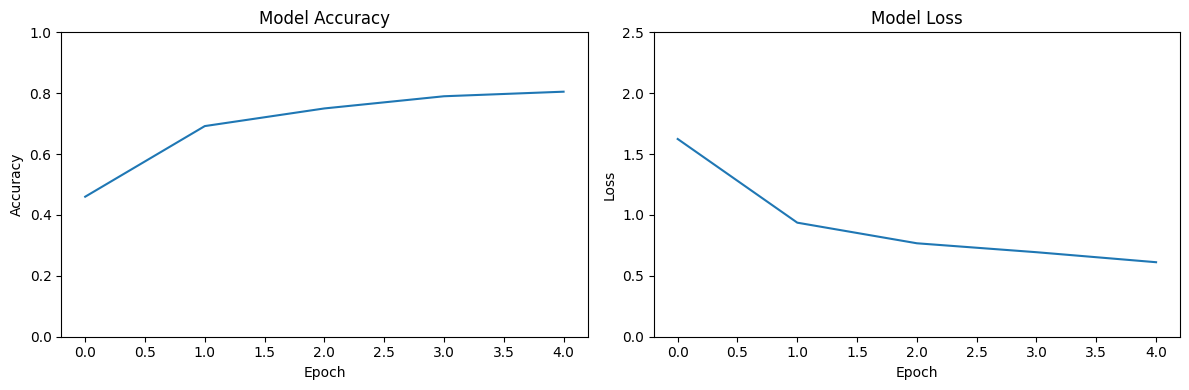

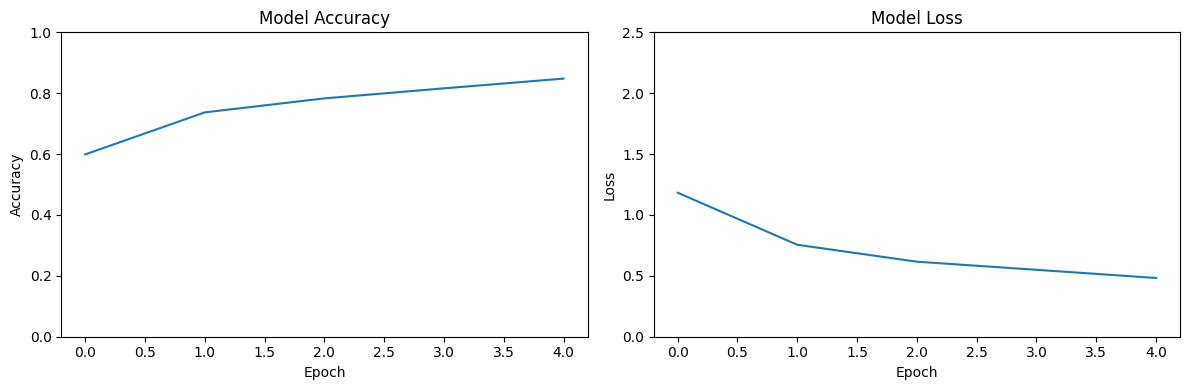

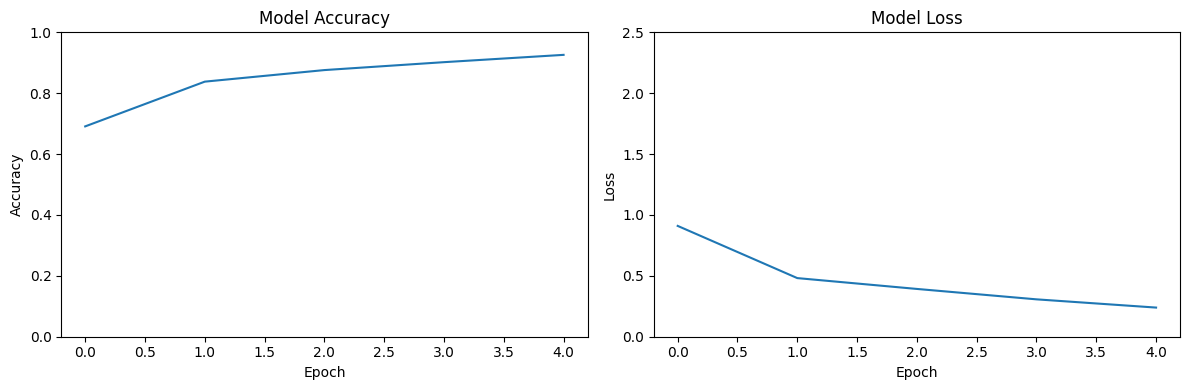

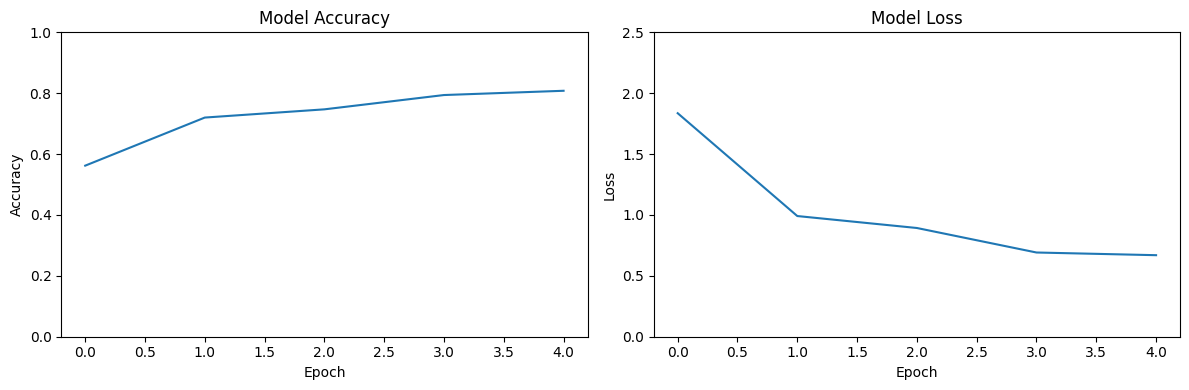

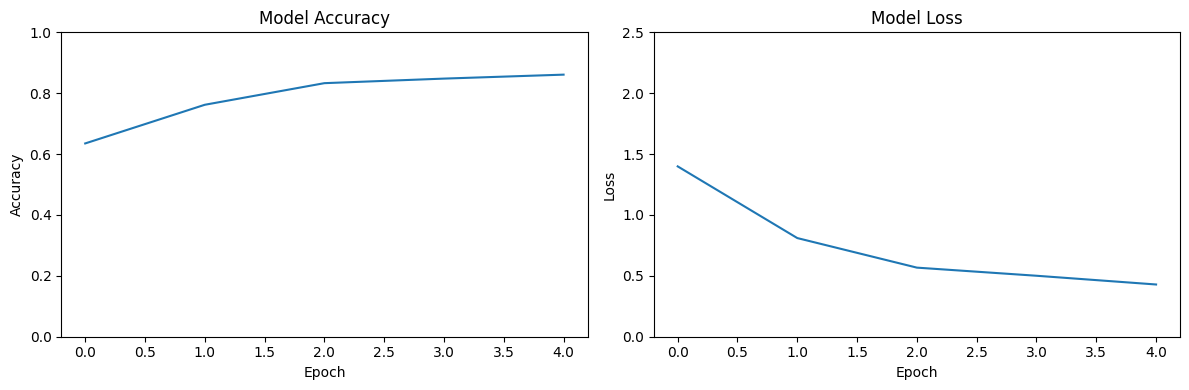

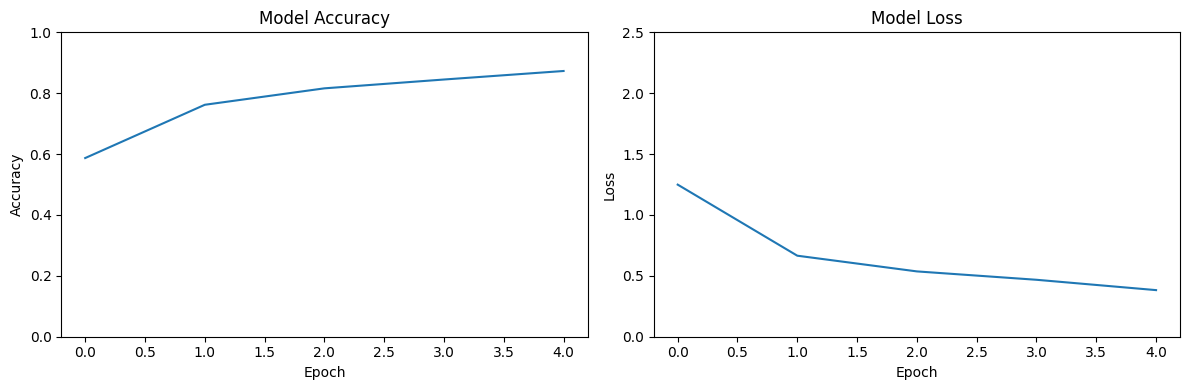

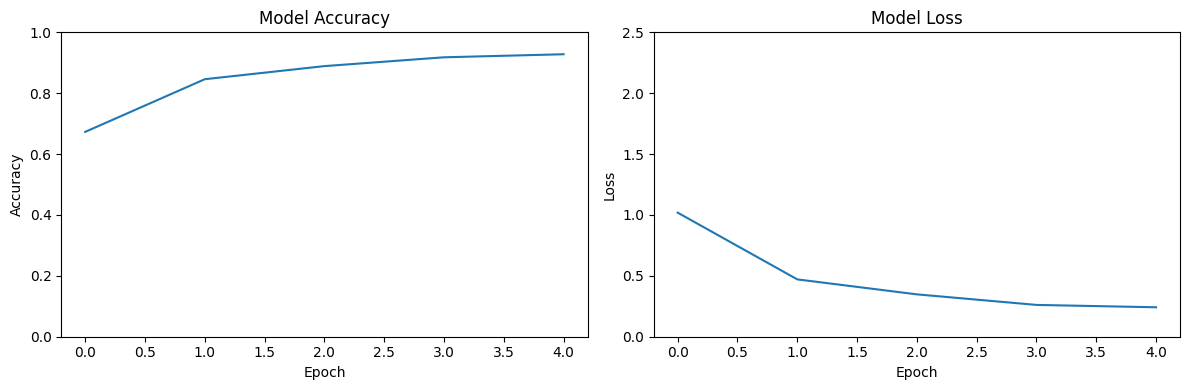

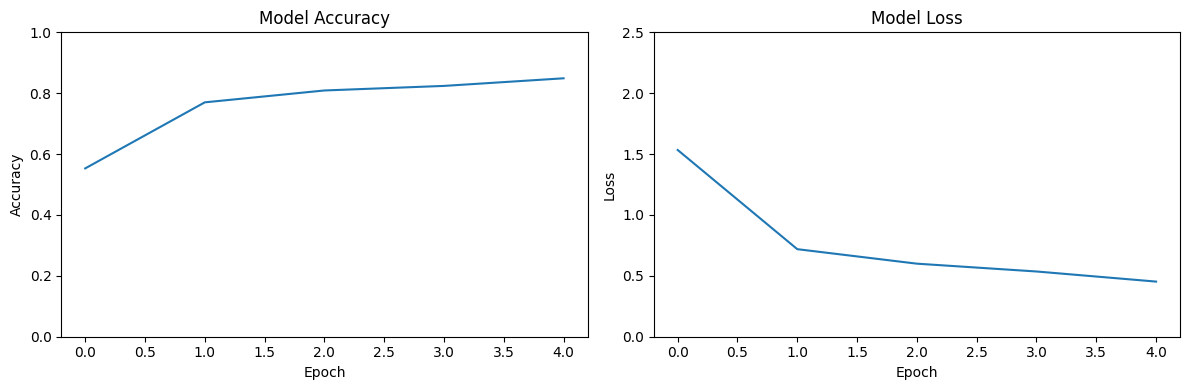

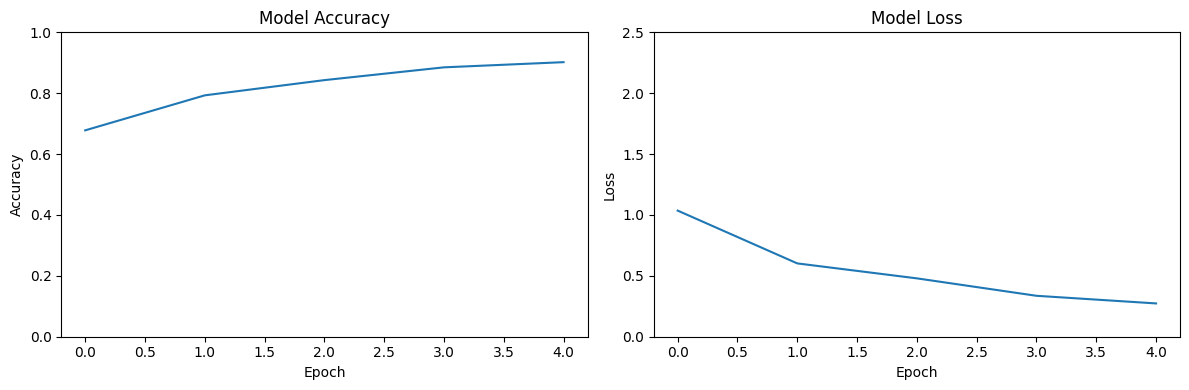

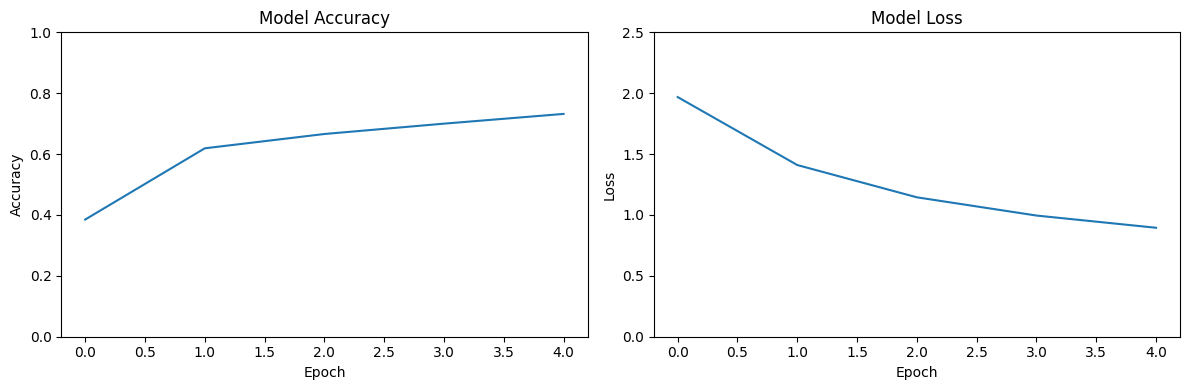

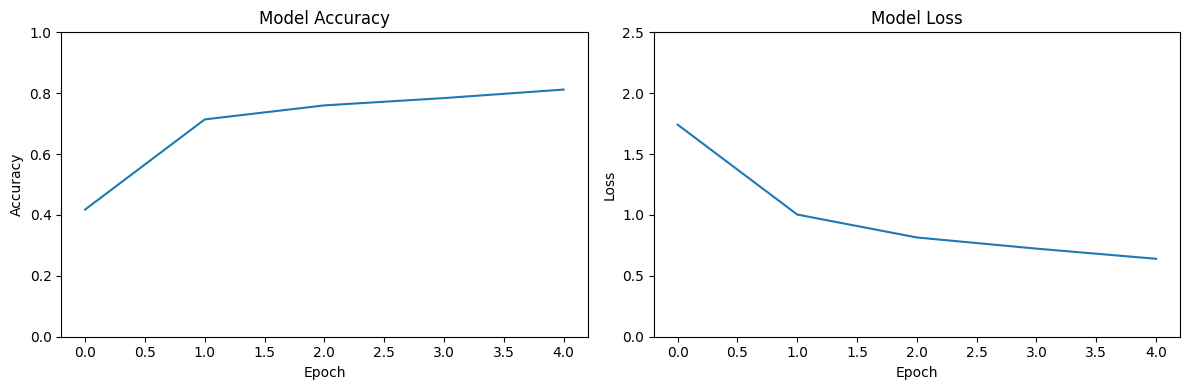

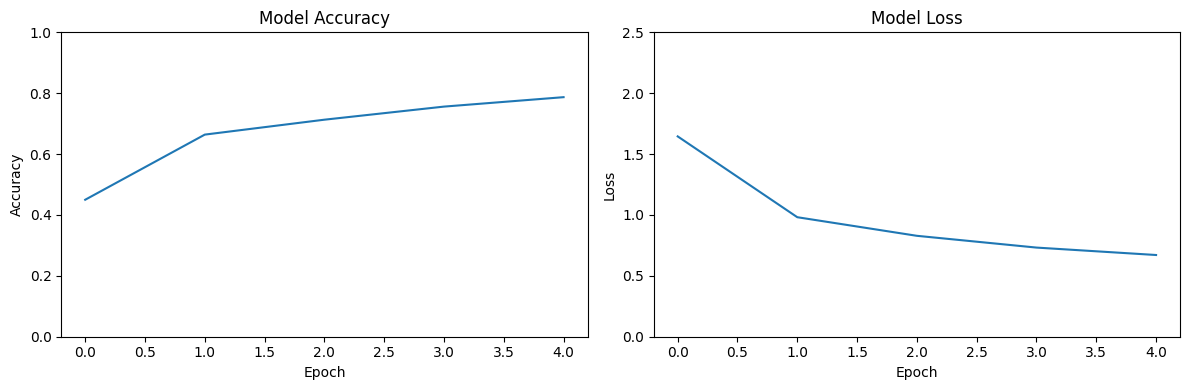

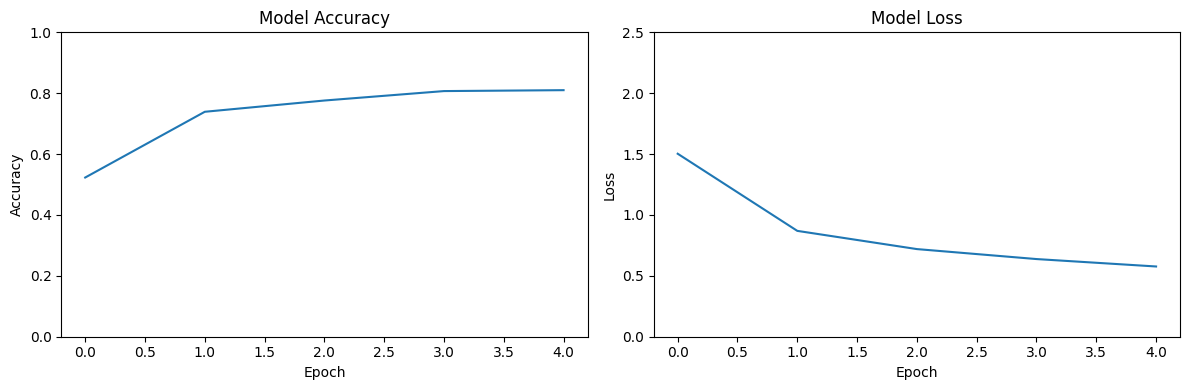

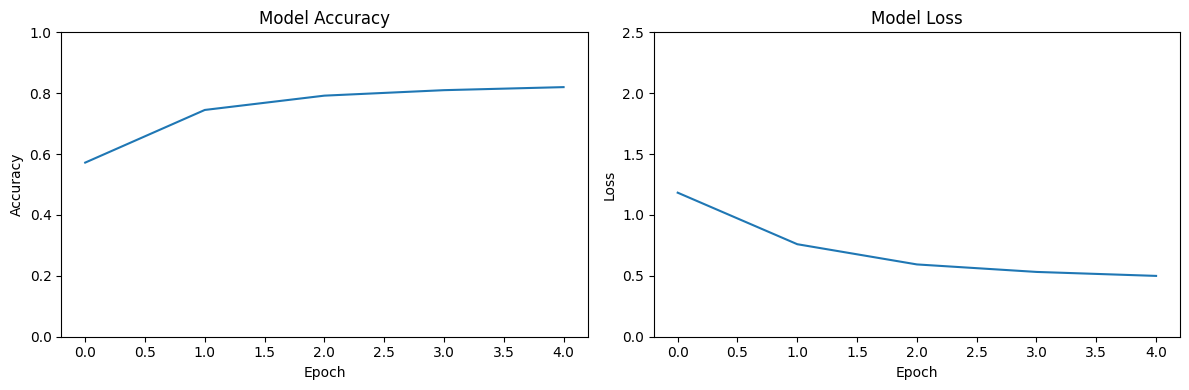

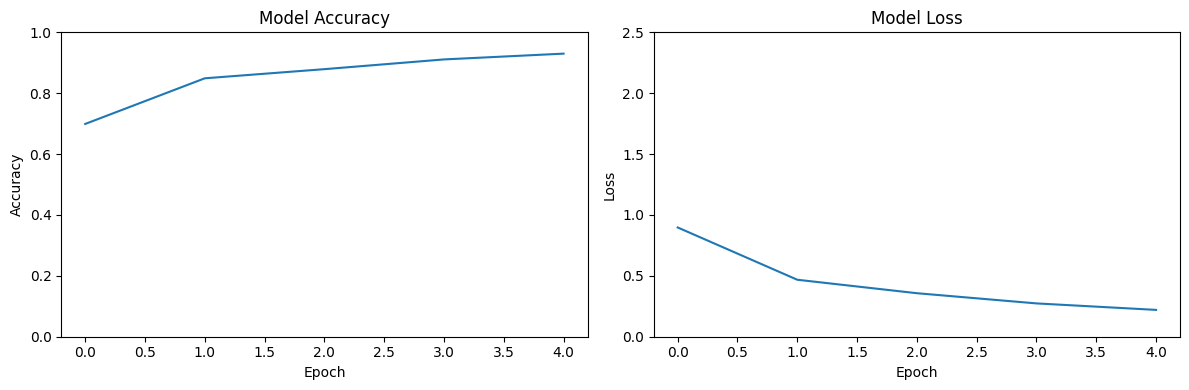

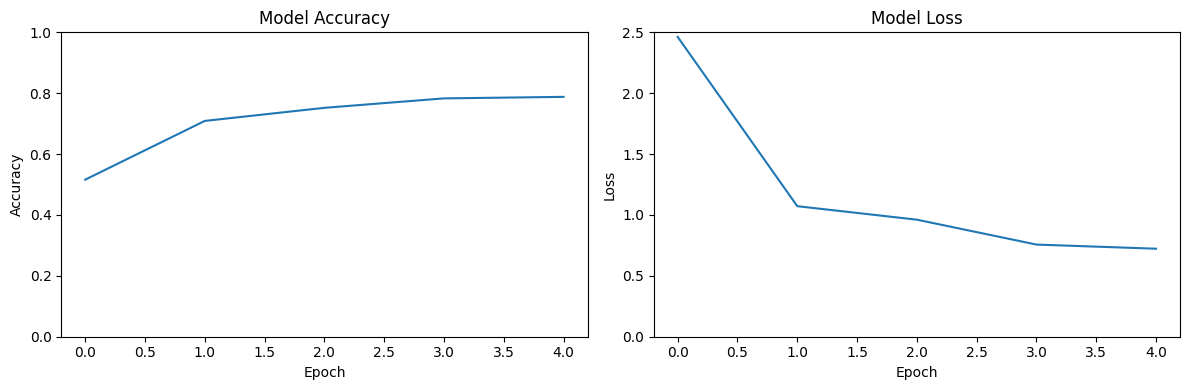

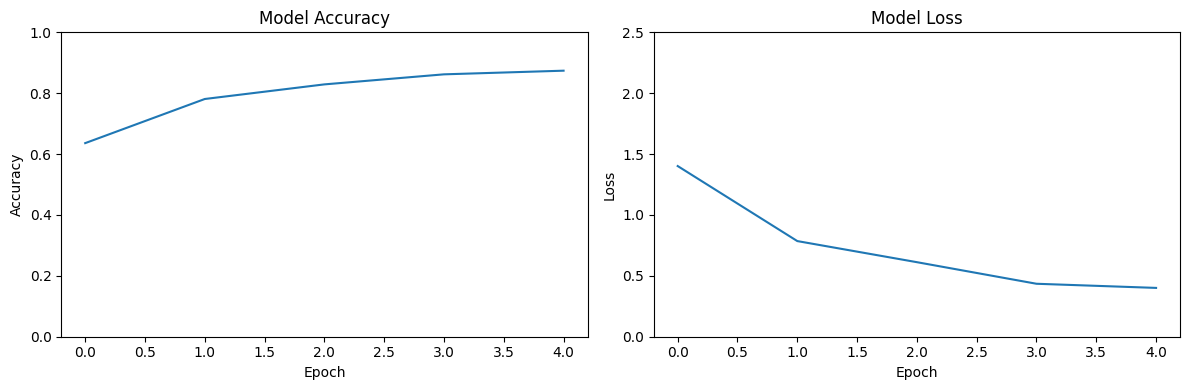

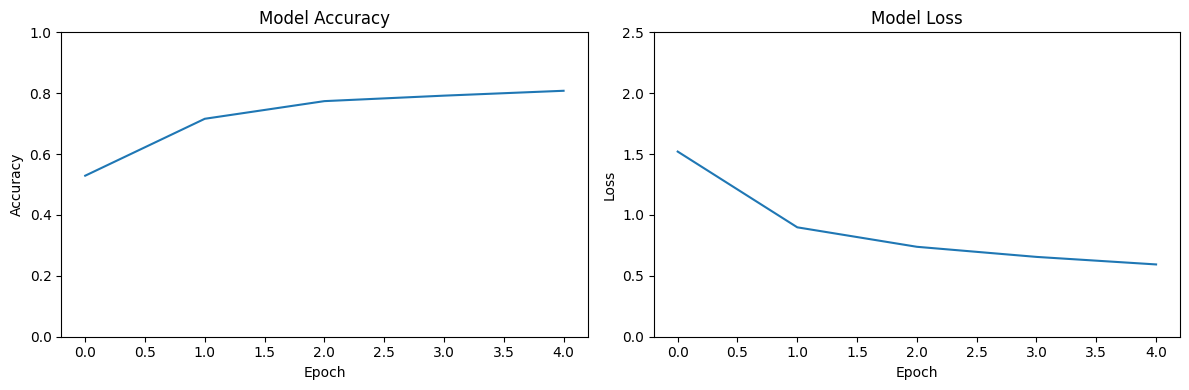

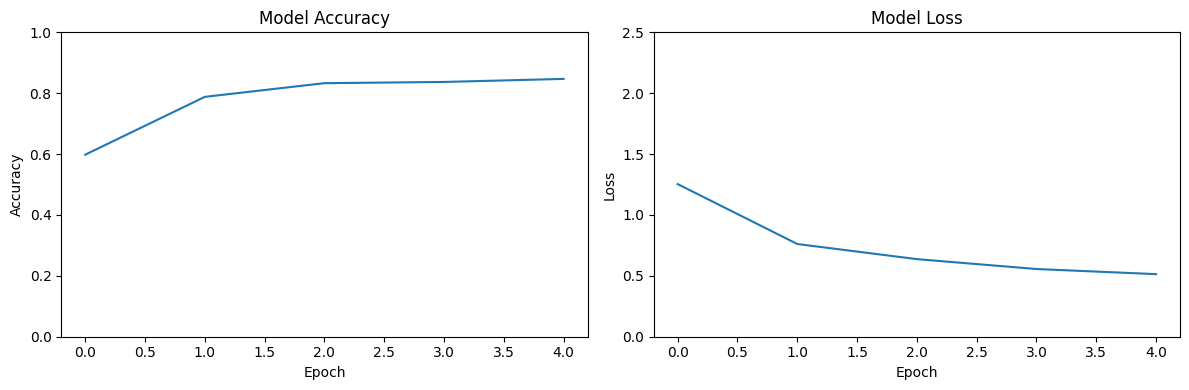

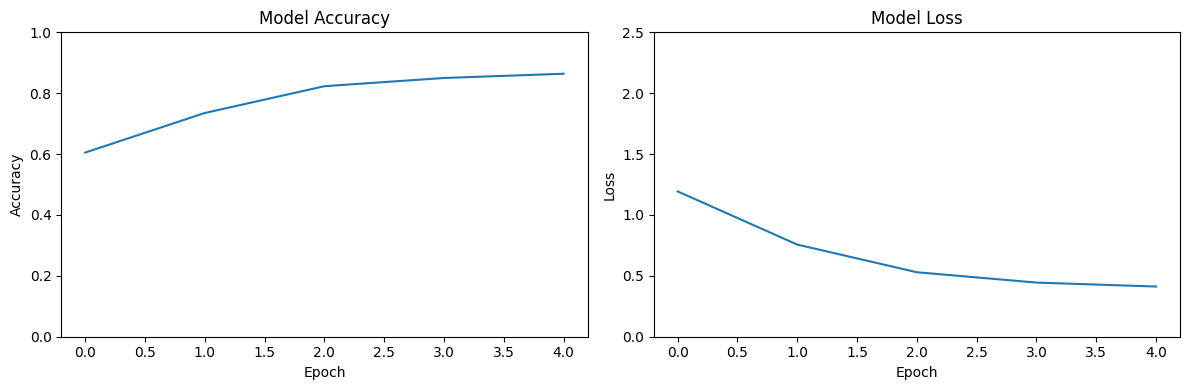

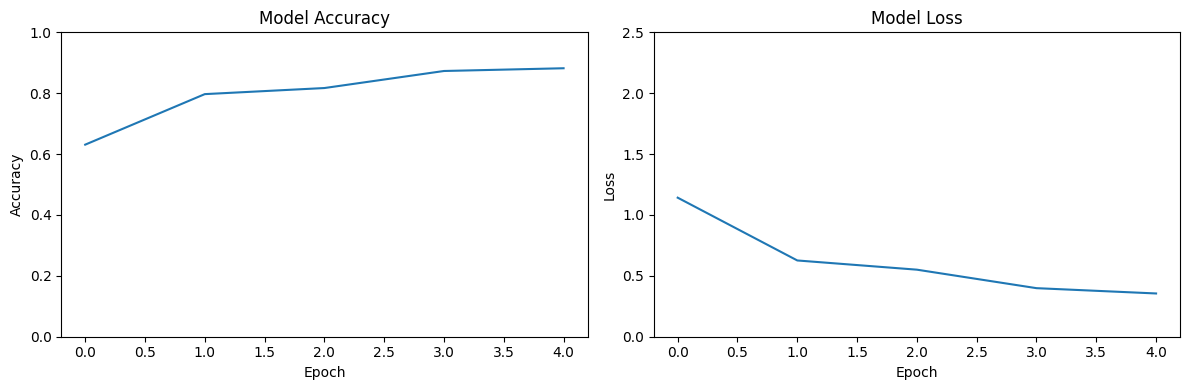

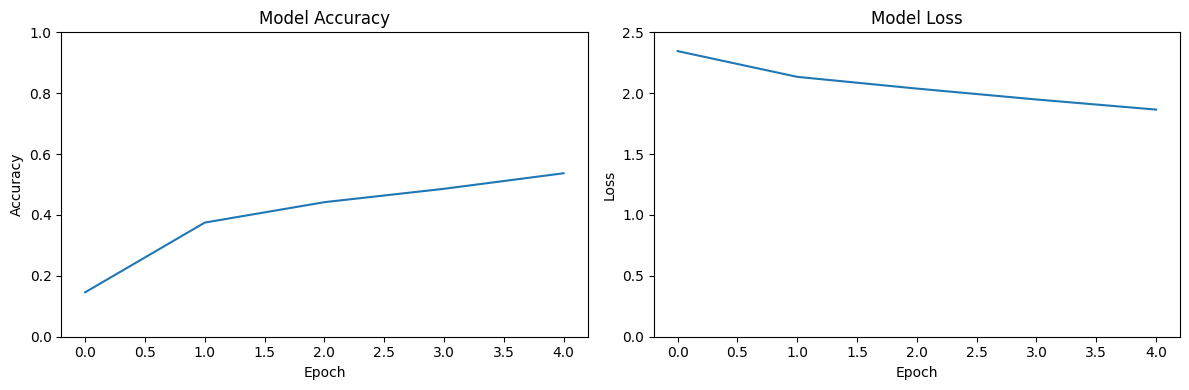

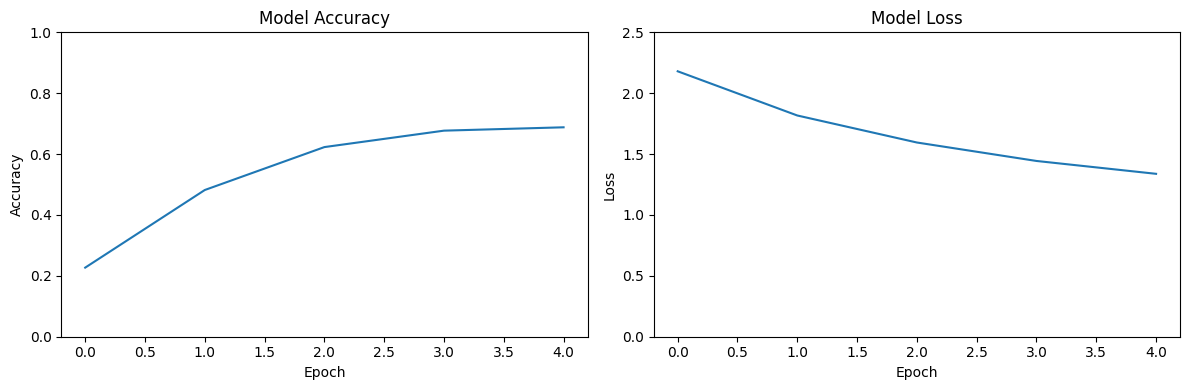

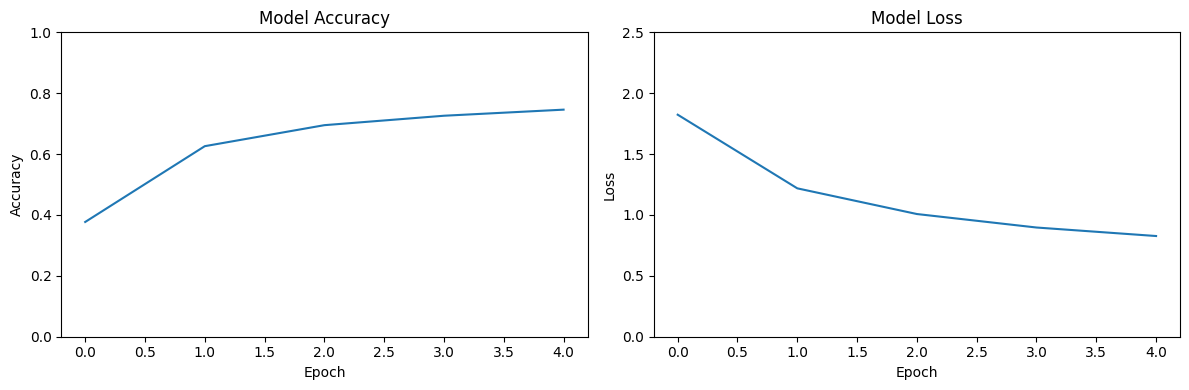

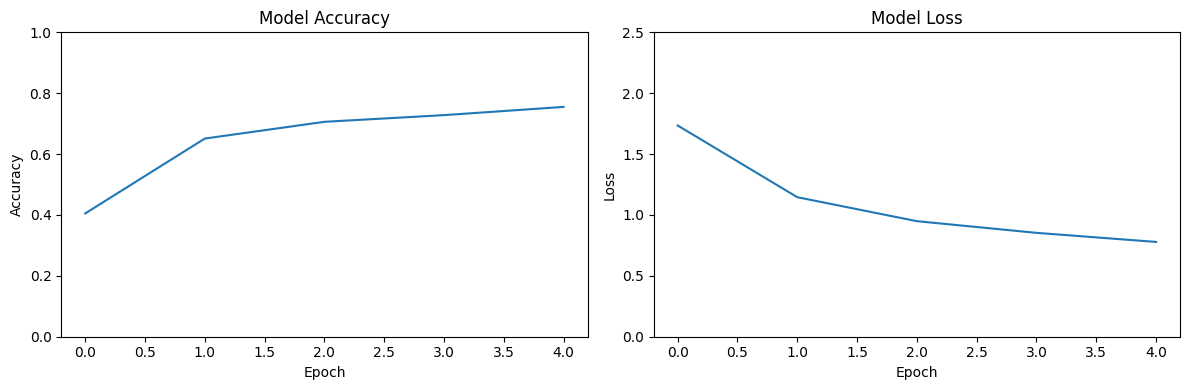

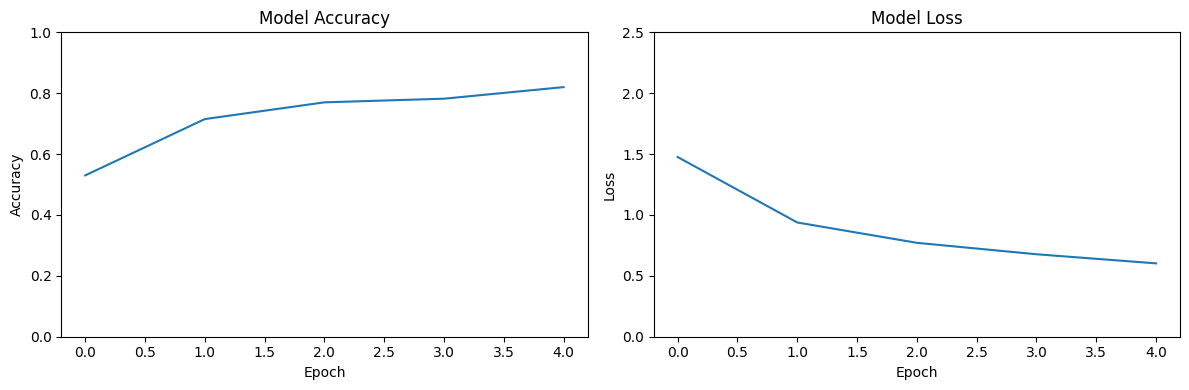

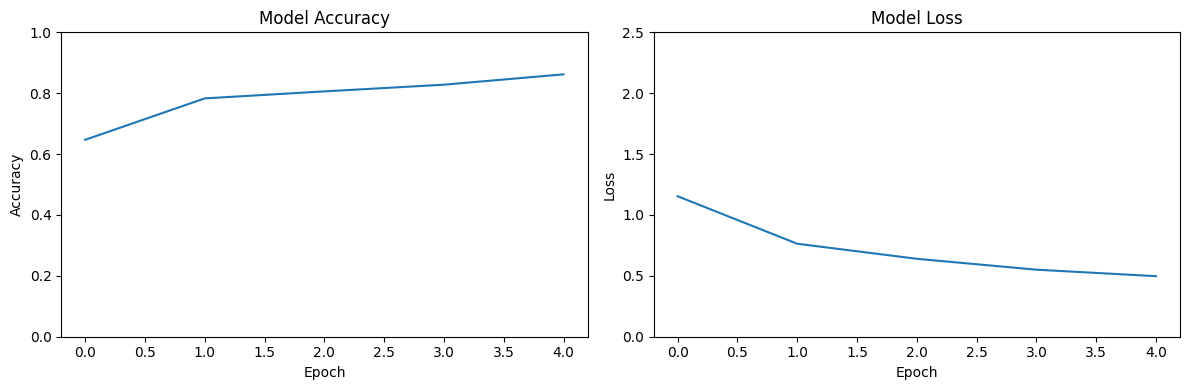

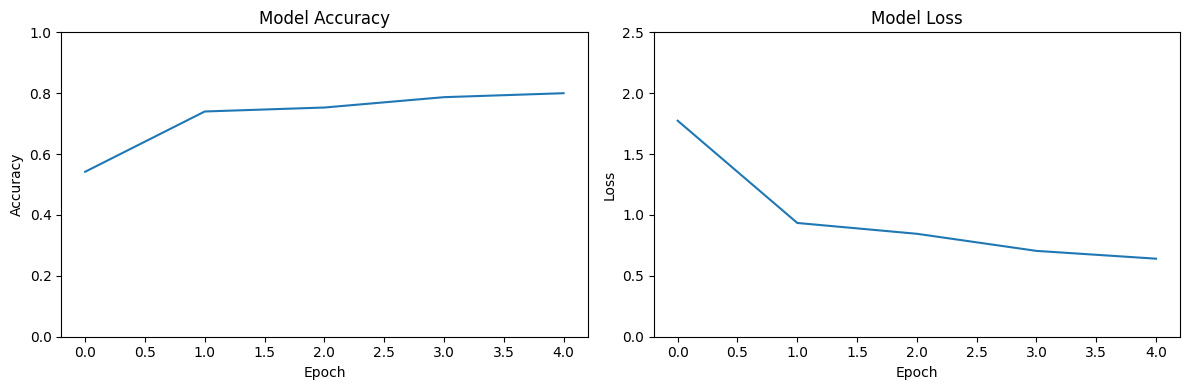

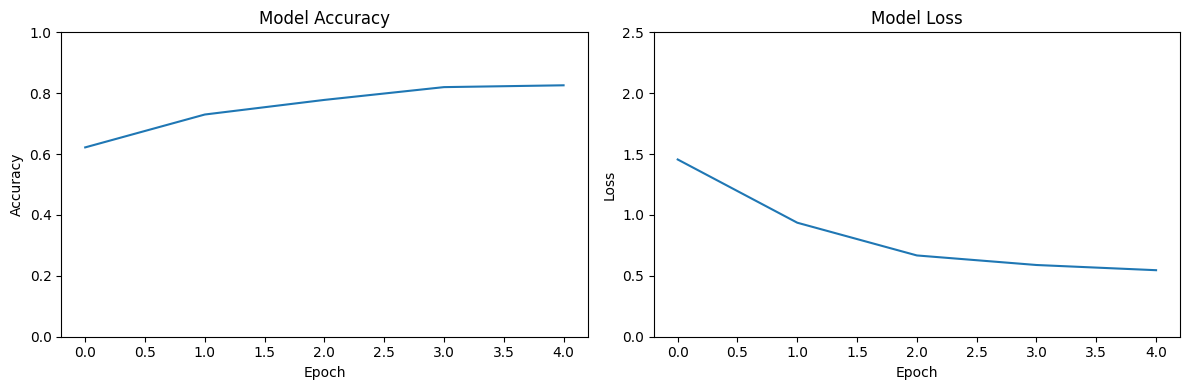

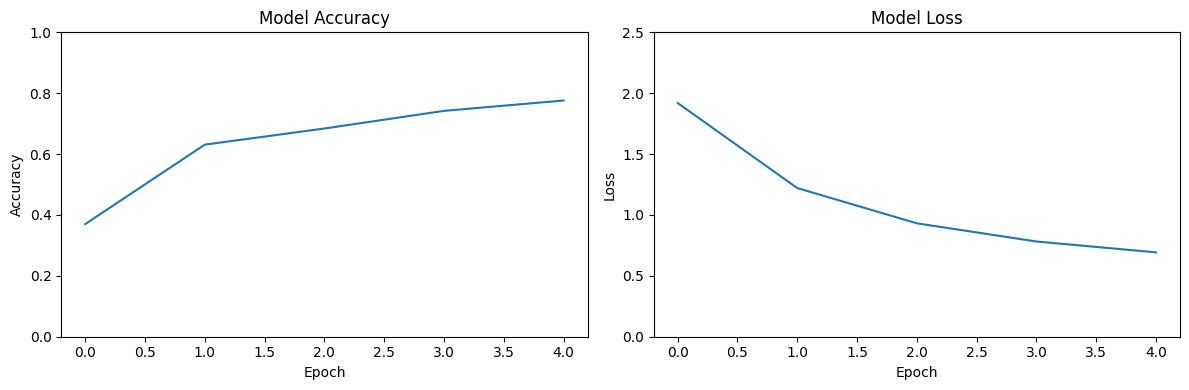

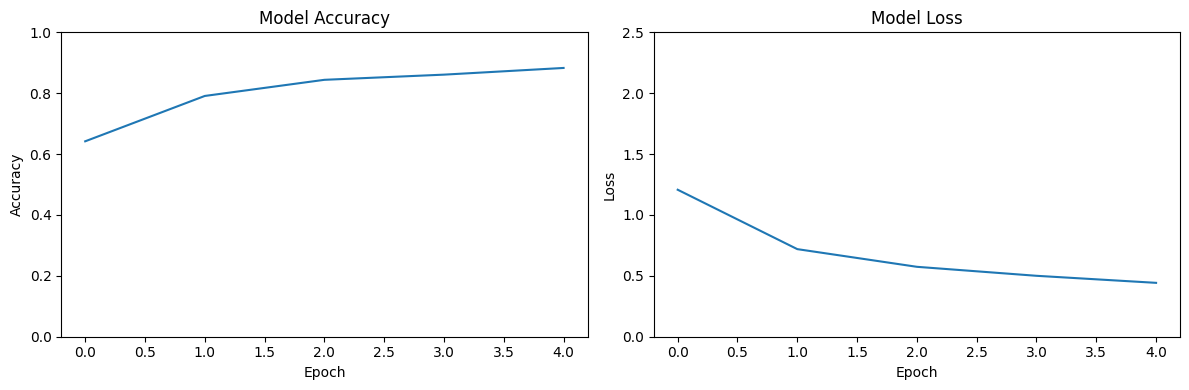

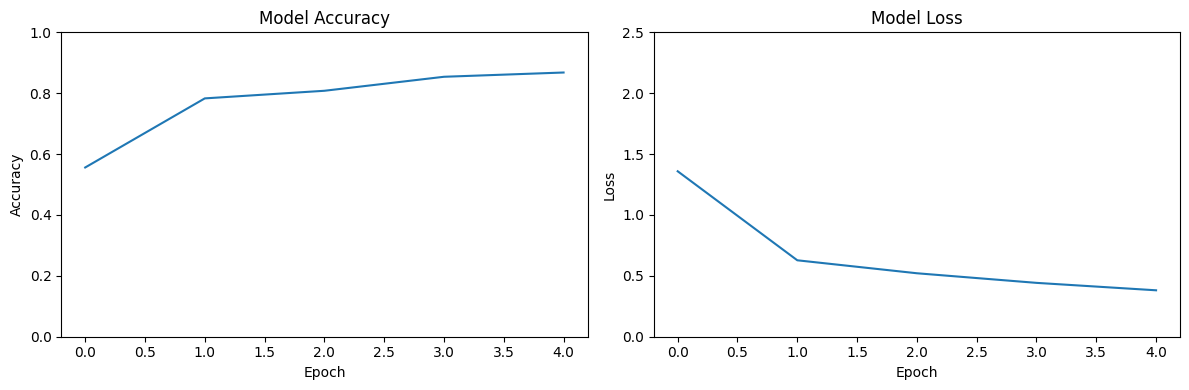

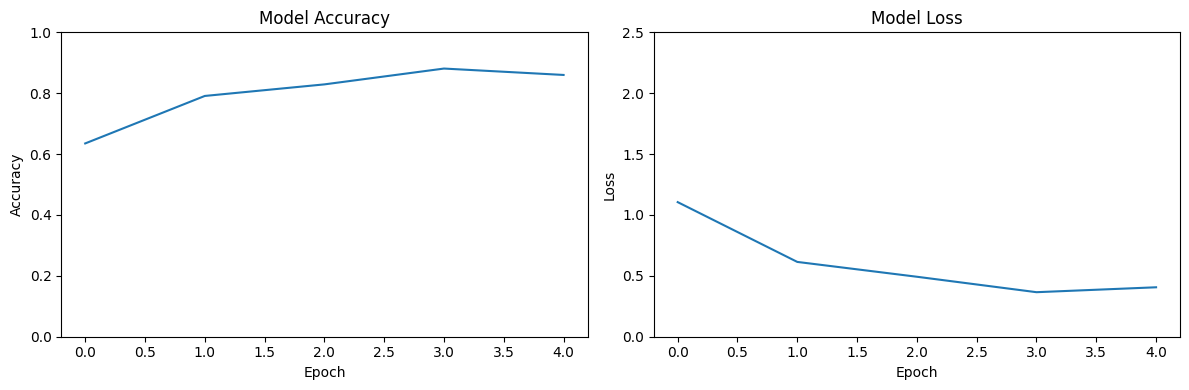

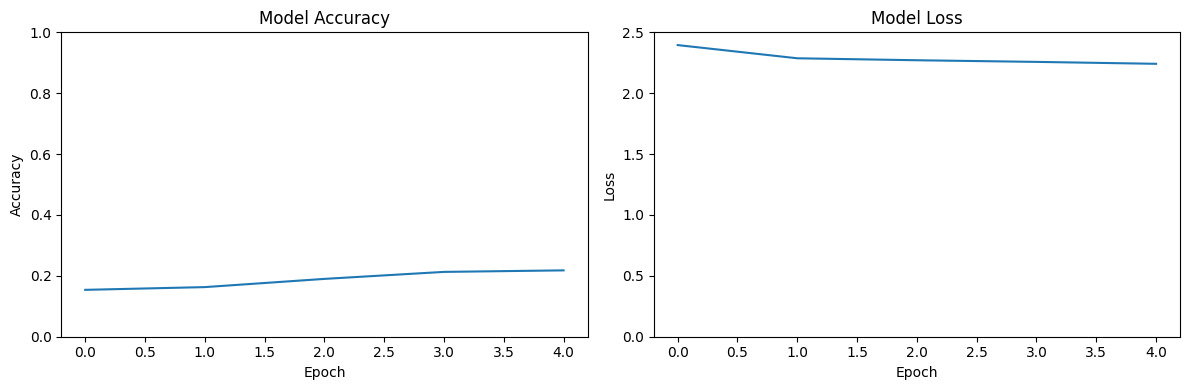

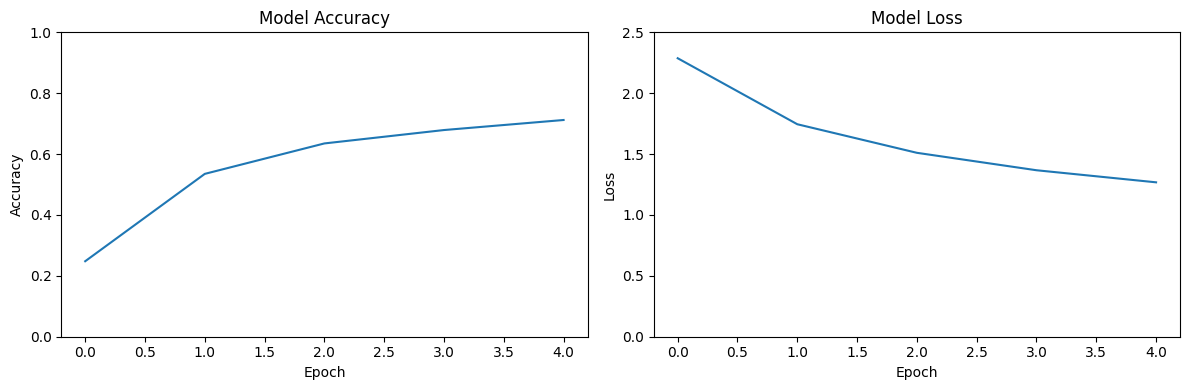

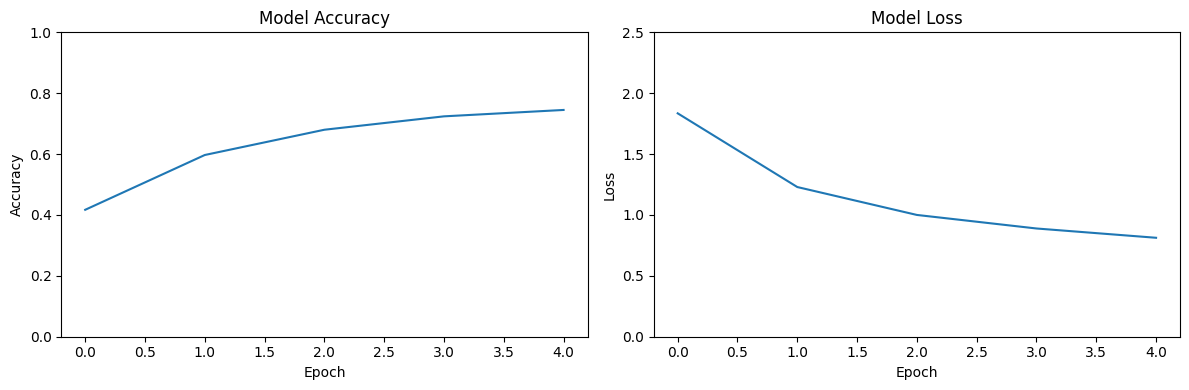

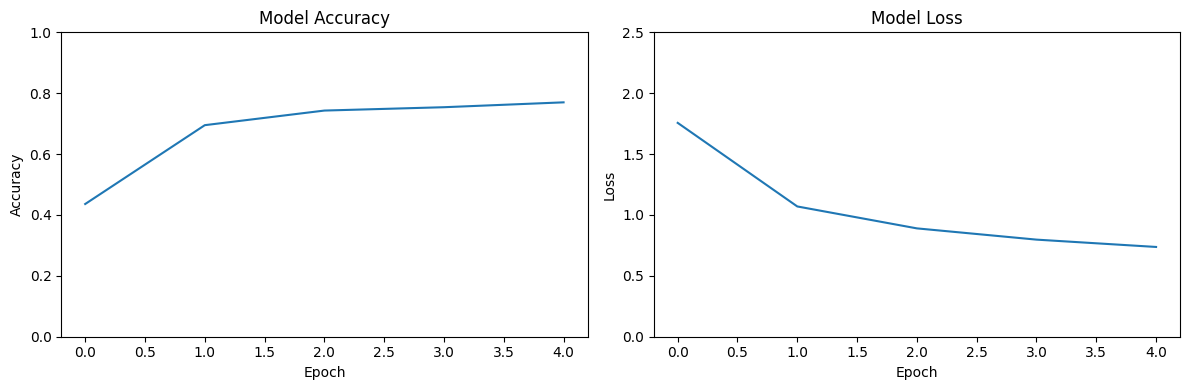

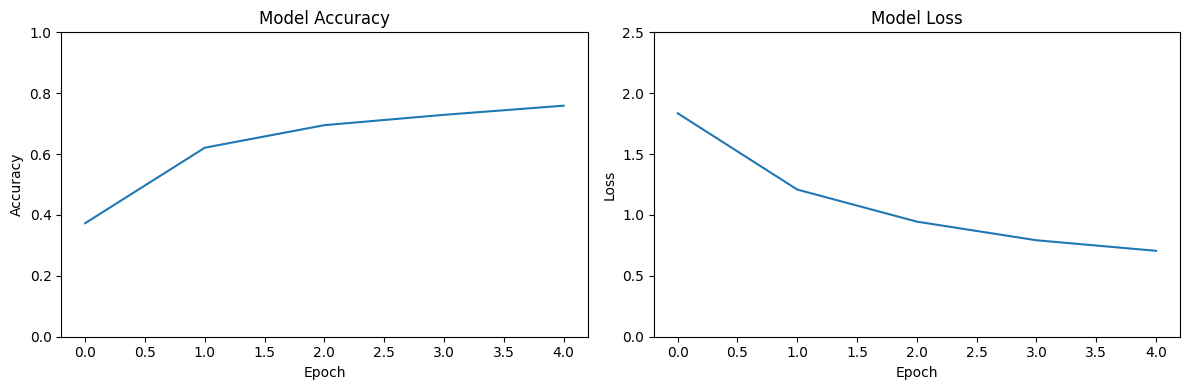

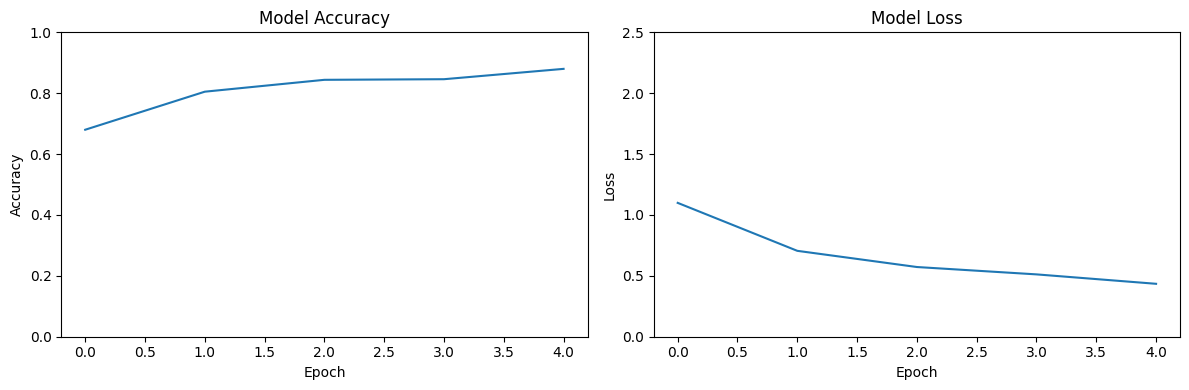

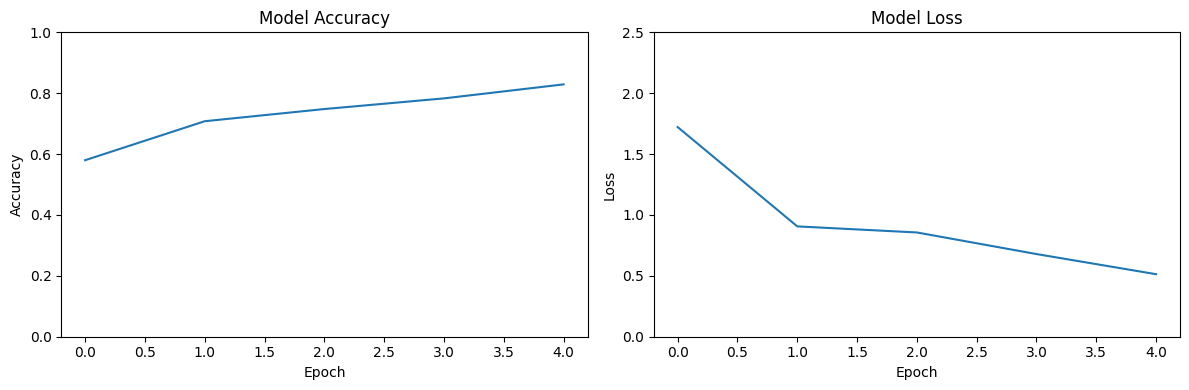

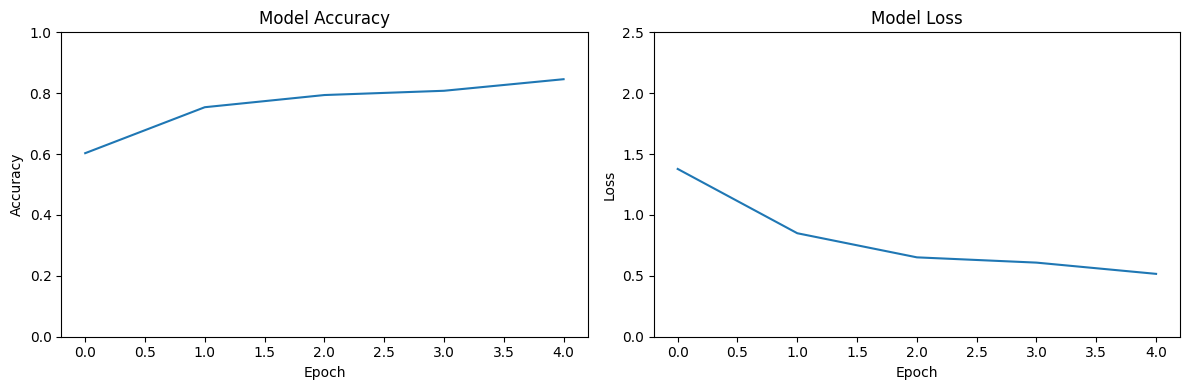

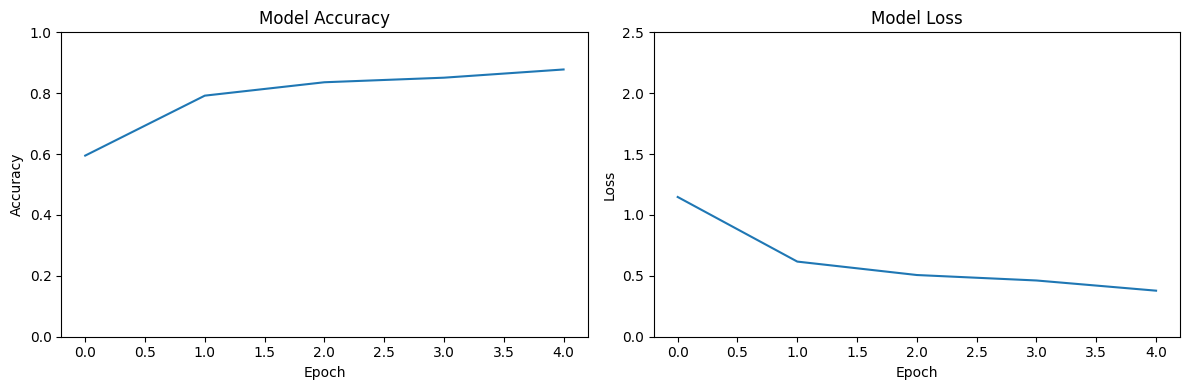

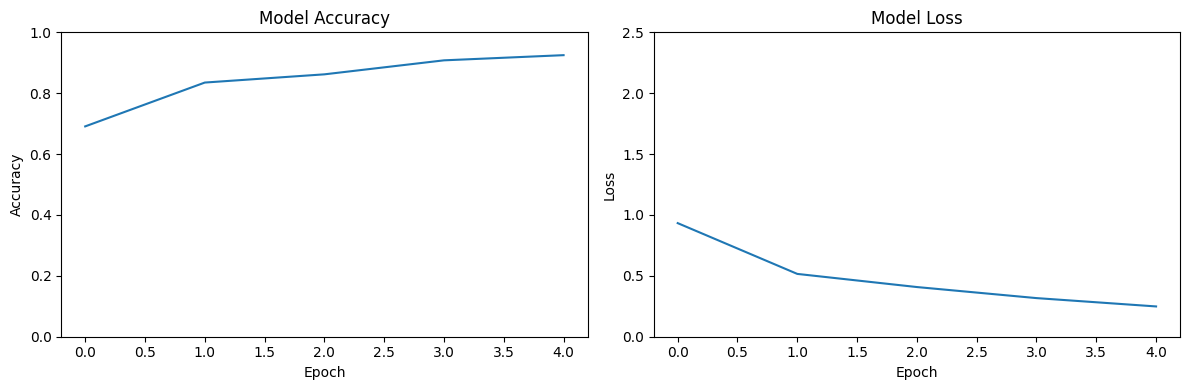

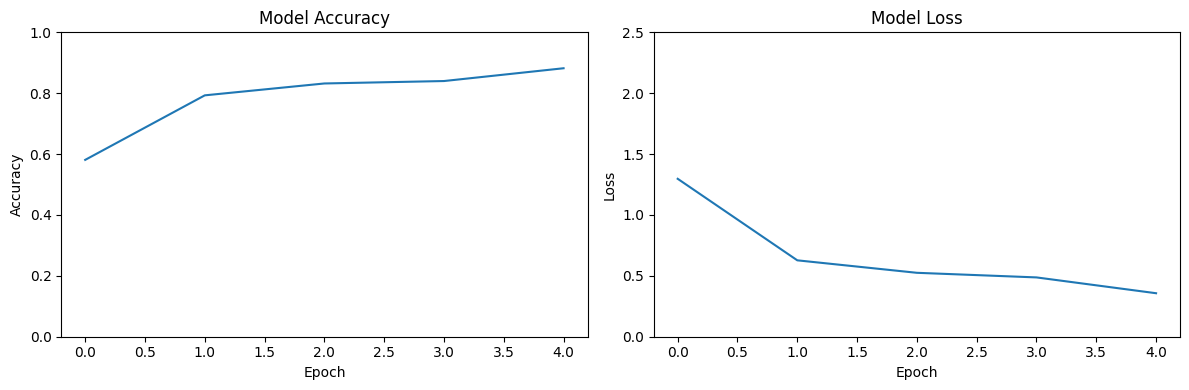

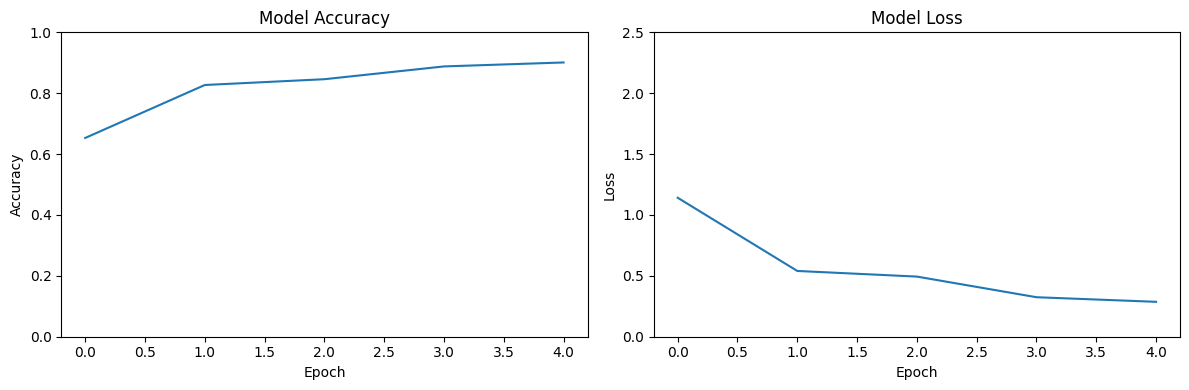

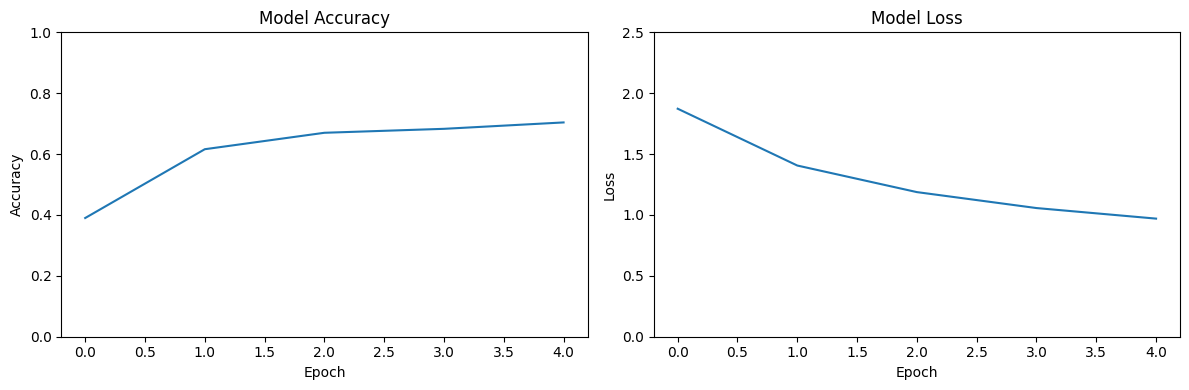

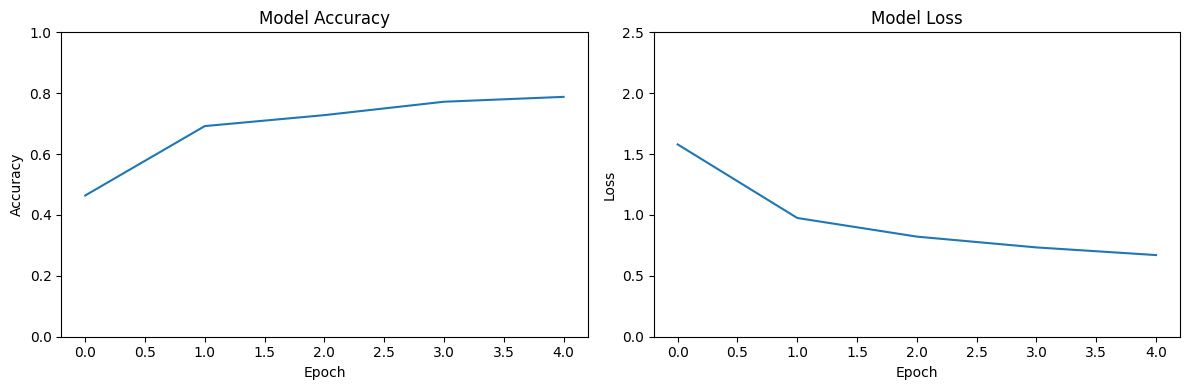

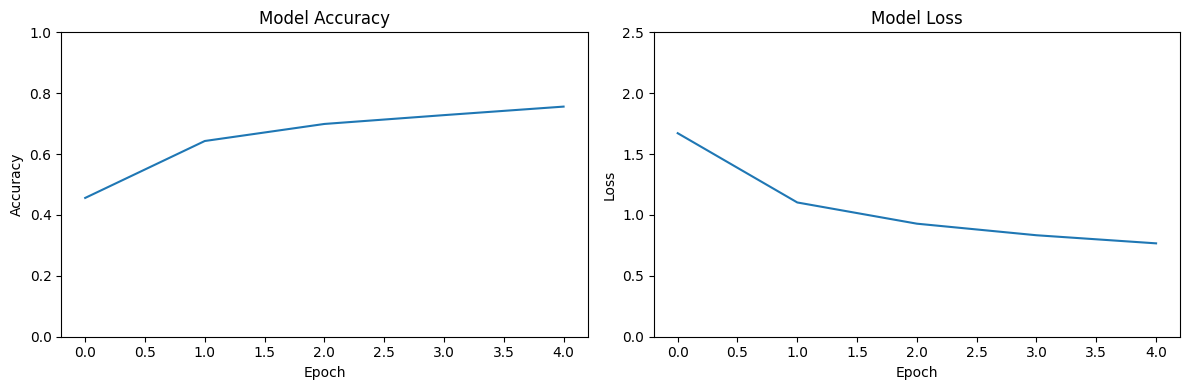

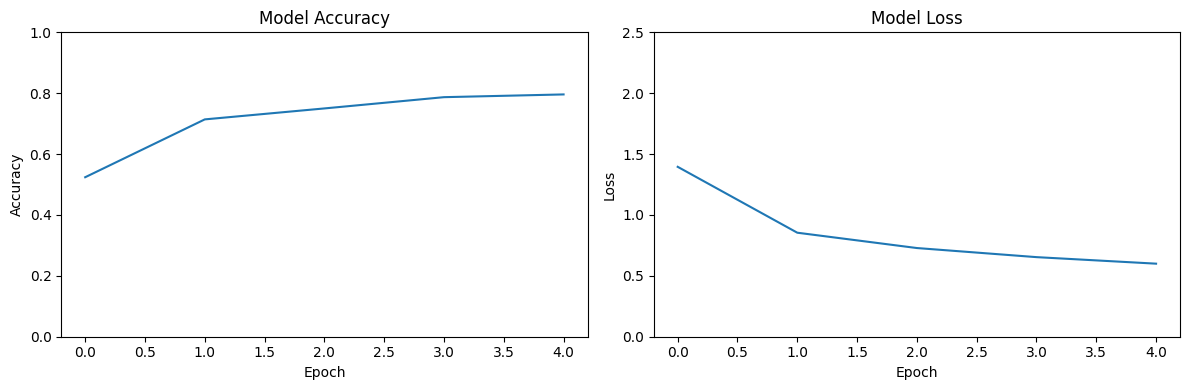

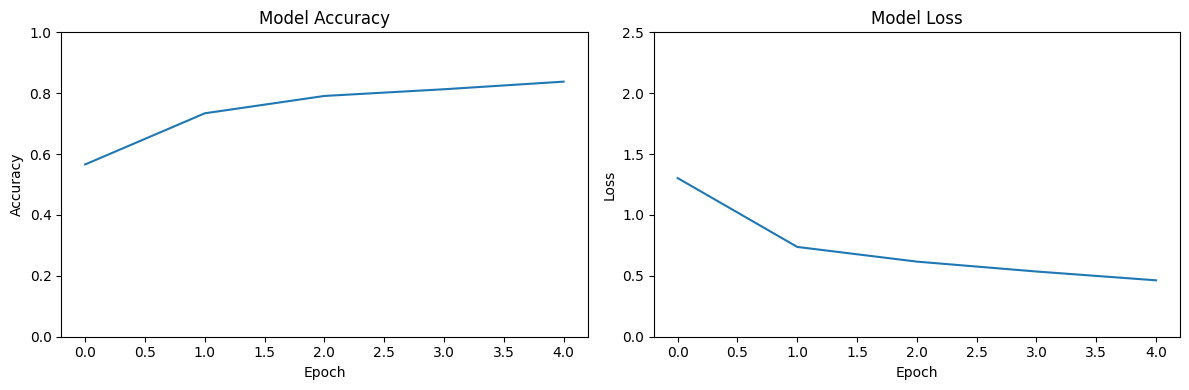

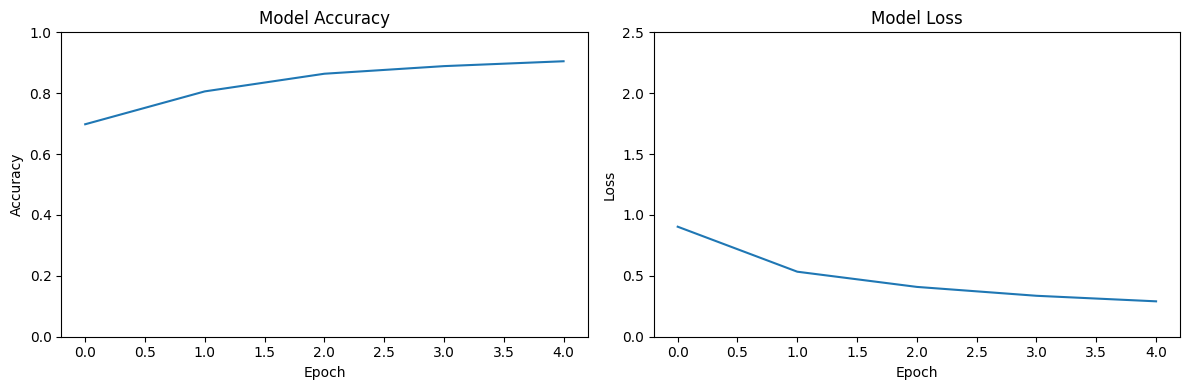

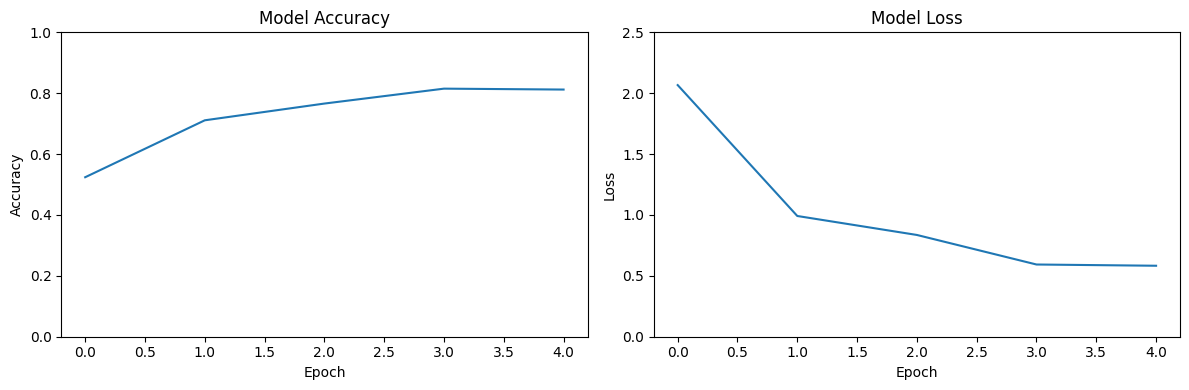

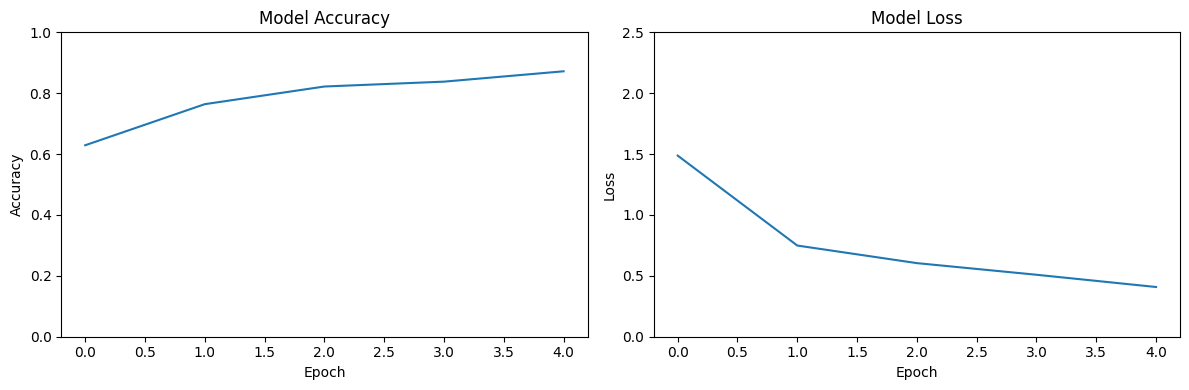

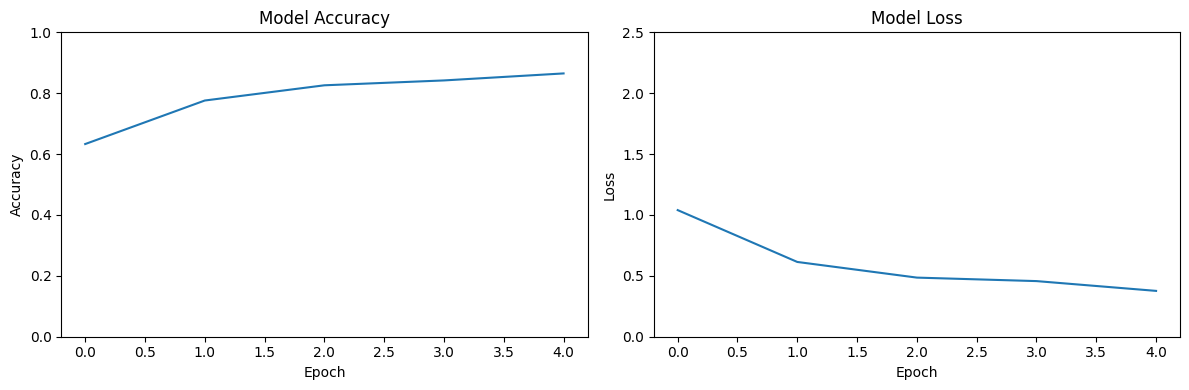

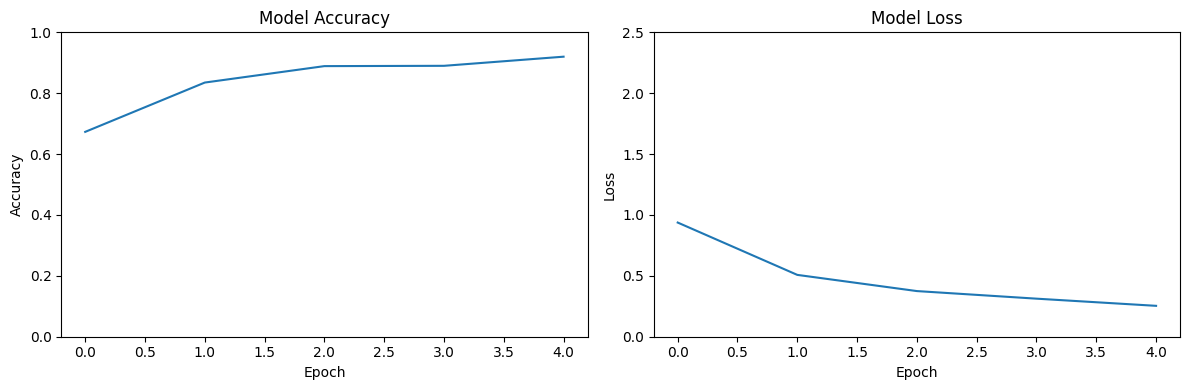

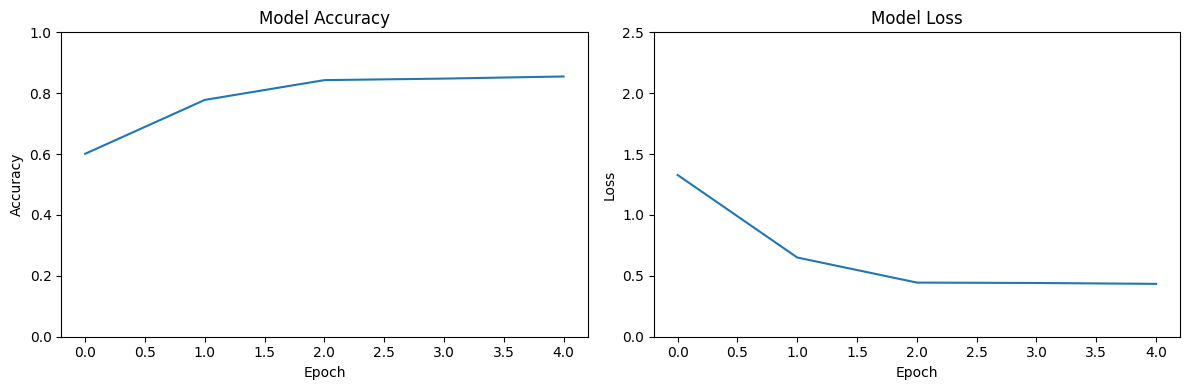

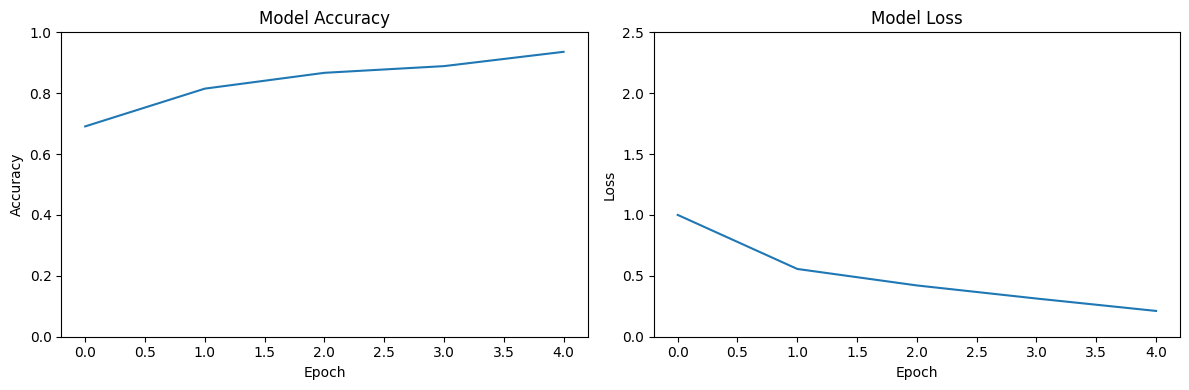

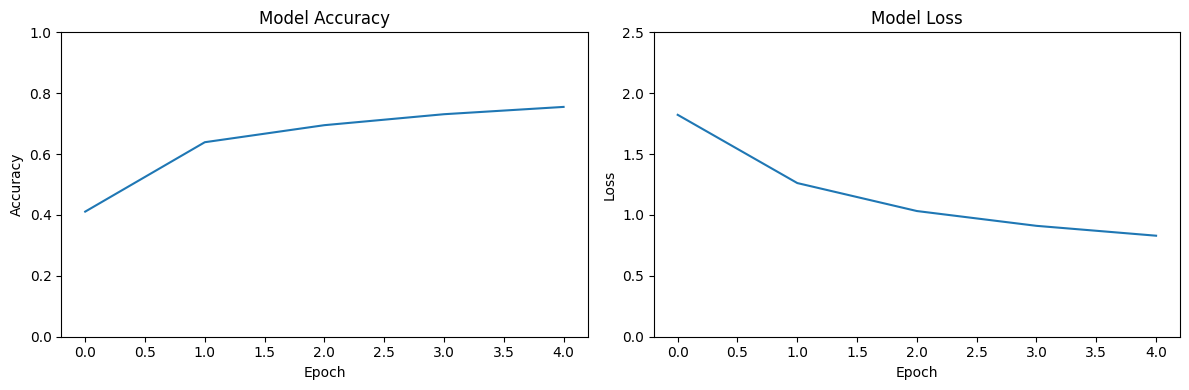

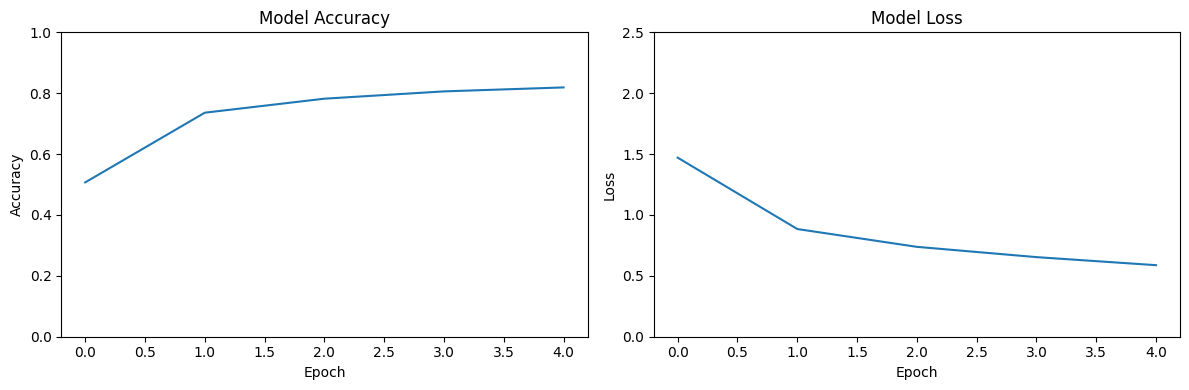

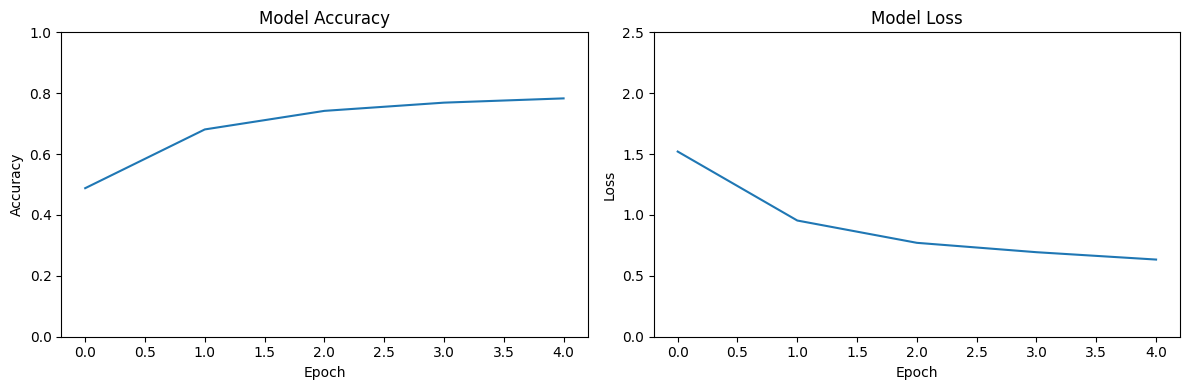

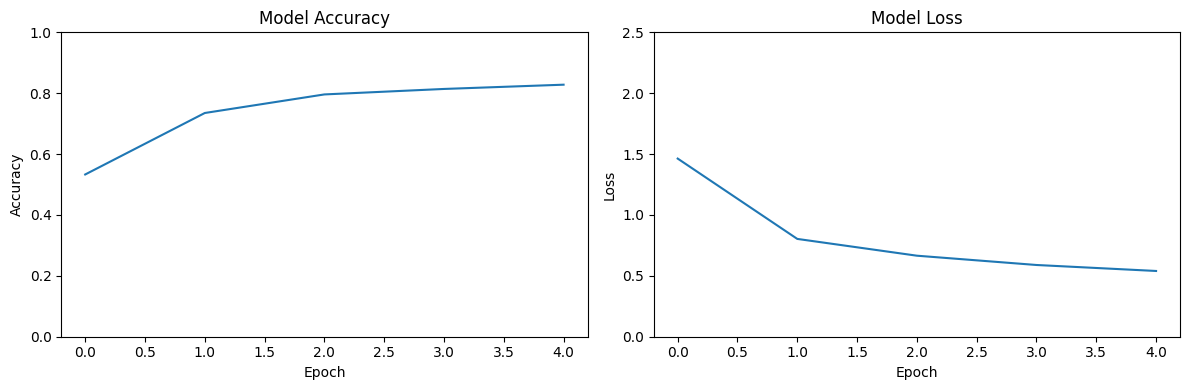

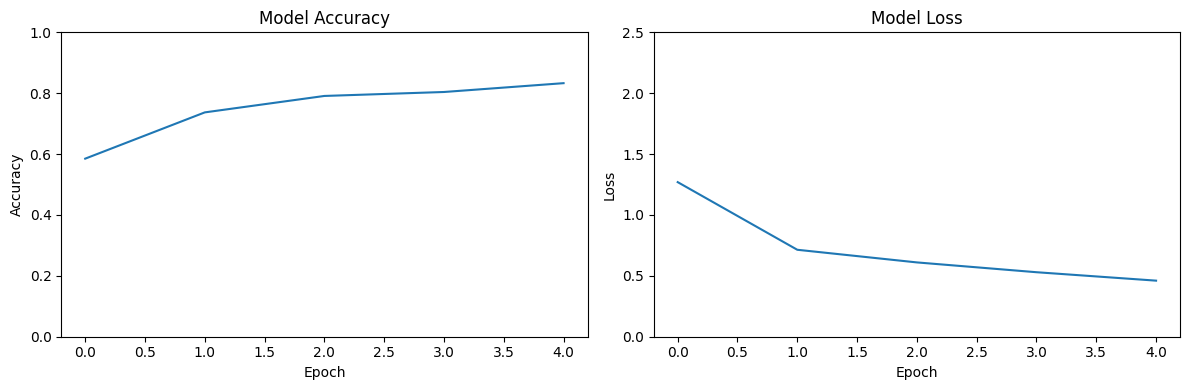

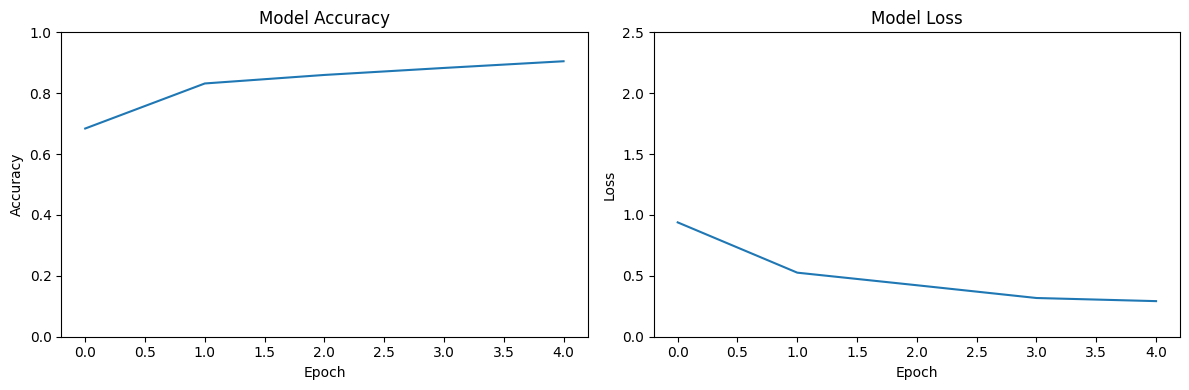

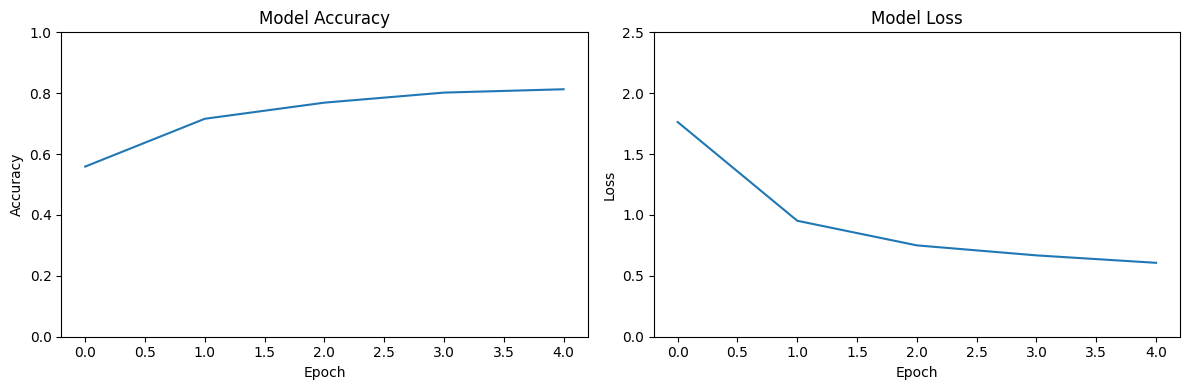

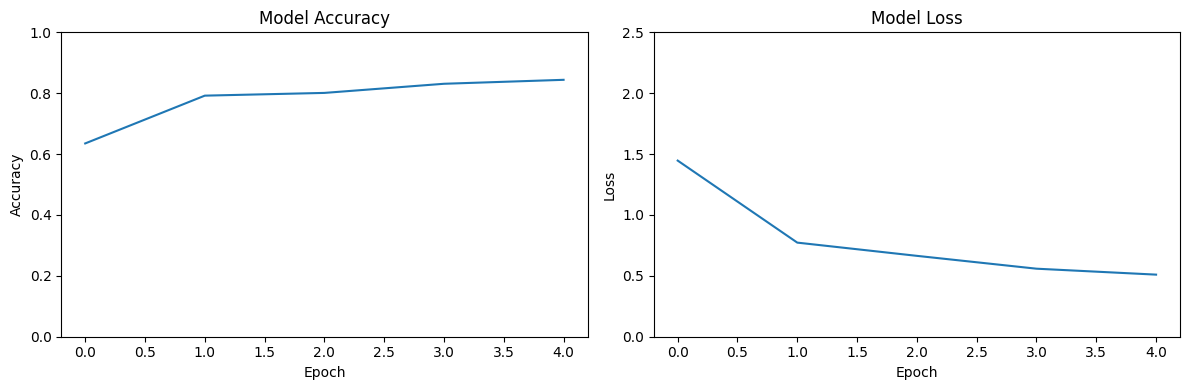

Activation Function: relu
Width: 1
Optimizer: Adam
Skip Connections: False
Batch Normalization: False
Hessian Matrix Shape (Initialization): (4, 4)
Hessian Matrix Shape (After Training): (4, 4)
Activation Function: relu
Width: 1
Optimizer: Adam
Skip Connections: False
Batch Normalization: True
Hessian Matrix Shape (Initialization): (6, 6)
Hessian Matrix Shape (After Training): (6, 6)
Activation Function: relu
Width: 1
Optimizer: Adam
Skip Connections: True
Batch Normalization: False
Hessian Matrix Shape (Initialization): (6, 6)
Hessian Matrix Shape (After Training): (6, 6)
Activation Function: relu
Width: 1
Optimizer: Adam
Skip Connections: True
Batch Normalization: True
Hessian Matrix Shape (Initialization): (8, 8)
Hessian Matrix Shape (After Training): (8, 8)
Activation Function: relu
Width: 1
Optimizer: SGD
Skip Connections: False
Batch Normalization: False
Hessian Matrix Shape (Initialization): (4, 4)
Hessian Matrix Shape (After Training): (4, 4)
Activation Function: relu
Width: 1


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, initializers, optimizers
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Load Fashion MNIST dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Normalize pixel values to between 0 and 1
train_images = train_images / 255.0

# Flatten the images for simplicity (you might want to use more complex architectures)
train_images = train_images.reshape((60000, 28 * 28))

# Function to build a neural network model with various architectural choices
def build_model(activation_function, width, use_skip_connections, use_batch_norm):
    inputs = tf.keras.Input(shape=(28 * 28,))
    x = inputs

    # Hidden layers
    for _ in range(width):
        if use_batch_norm:
            x = layers.Dense(256, activation=None, kernel_initializer='he_normal')(x)
            x = layers.BatchNormalization()(x)
            x = layers.Activation(activation_function)(x)
        else:
            x = layers.Dense(256, activation=activation_function, kernel_initializer='he_normal')(x)

        if use_skip_connections:
            # Add a projection layer for matching dimensions
            projection = layers.Dense(256, kernel_initializer='he_normal')(inputs)
            x = layers.Add()([x, projection])

    # Output layer
    outputs = layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


# Function to calculate the Hessian matrix
def calculate_hessian(model, data):
    inputs = tf.convert_to_tensor(data['inputs'])
    labels = tf.convert_to_tensor(data['labels'])

    with tf.GradientTape(persistent=True) as tape:
        # Forward pass
        predictions = model(inputs)
        loss = tf.keras.losses.sparse_categorical_crossentropy(labels, predictions)

    # Gradients
    grads = tape.gradient(loss, model.trainable_variables)

    # Hessian matrix
    hessian = []
    for grad1 in grads:
        hess_row = []
        for grad2 in grads:
            hess_row.append(tape.gradient(grad1, grad2))
        hessian.append(hess_row)

    return hessian

import matplotlib.pyplot as plt


def run_experiments(activation_functions, widths, use_skip_connections, use_batch_norm, optimizers, data, epochs=5):
    results = []

    for activation_function in activation_functions:
        for width in widths:
            for optimizer_name, optimizer_class in optimizers.items():
                for skip_connections in use_skip_connections:
                    for batch_norm in use_batch_norm:
                        model = build_model(activation_function, width, skip_connections, batch_norm)

                        # Create an instance of the legacy optimizer
                        optimizer_instance = optimizer_class()

                        # Compile the model
                        model.compile(optimizer=optimizer_instance,
                                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                        # Train the model with history
                        history = model.fit(data['inputs'], data['labels'], epochs=epochs, verbose=0)

                        # Calculate Hessian at initialization
                        hessian_init = calculate_hessian(model, data)

                        # Calculate Hessian after training
                        hessian_train = calculate_hessian(model, data)

                        result = {
                            'activation_function': activation_function.__name__,
                            'width': width,
                            'optimizer': optimizer_name,
                            'skip_connections': skip_connections,
                            'batch_norm': batch_norm,
                            'hessian_init': hessian_init,
                            'hessian_train': hessian_train,
                            'history': history.history  # Store the training history
                        }
                        results.append(result)

                        # # Plot accuracy and loss
                        plt.figure(figsize=(12, 4))
                        plt.subplot(1, 2, 1)
                        plt.plot(history.history['accuracy'])
                        plt.title('Model Accuracy')
                        plt.xlabel('Epoch')
                        plt.ylabel('Accuracy')
                        plt.ylim([0, 1])

                        plt.subplot(1, 2, 2)
                        plt.plot(history.history['loss'])
                        plt.title('Model Loss')
                        plt.xlabel('Epoch')
                        plt.ylabel('Loss')
                        plt.ylim([0, 2.5])

                        plt.tight_layout()
                        plt.show()

    return results


# Prepare data for the experiment
data = {'inputs': train_images[:1000], 'labels': train_labels[:1000]}

# Define activation functions, widths, and optimizers for experiments
activation_functions = [tf.keras.activations.relu, tf.keras.activations.sigmoid, tf.keras.activations.tanh]

widths = [1, 2]  # Vary the width of the network

use_skip_connections = [False, True]
use_batch_norm = [False, True]

optimizers = {
    'Adam': tf.keras.optimizers.Adam,
    'SGD': tf.keras.optimizers.SGD,
    'RMSprop': tf.keras.optimizers.RMSprop
}


# Run experiments
experiment_results = run_experiments(activation_functions, widths, use_skip_connections, use_batch_norm, optimizers, data)

# Print or further analyze the results
for result in experiment_results:
    print(f"Activation Function: {result['activation_function']}")
    print(f"Width: {result['width']}")
    print(f"Optimizer: {result['optimizer']}")
    print(f"Skip Connections: {result['skip_connections']}")
    print(f"Batch Normalization: {result['batch_norm']}")
    print(f"Hessian Matrix Shape (Initialization): {np.shape(result['hessian_init'])}")
    print(f"Hessian Matrix Shape (After Training): {np.shape(result['hessian_train'])}")
    print("="*50)


# Plots for the report:

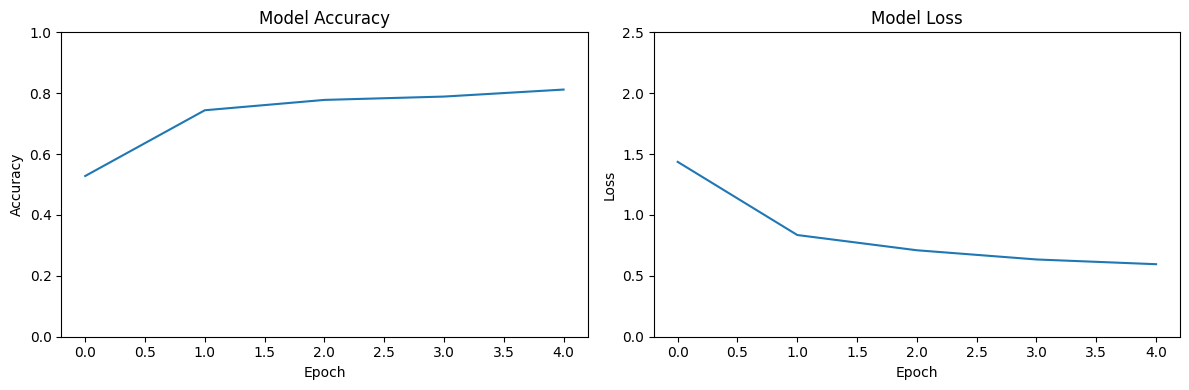

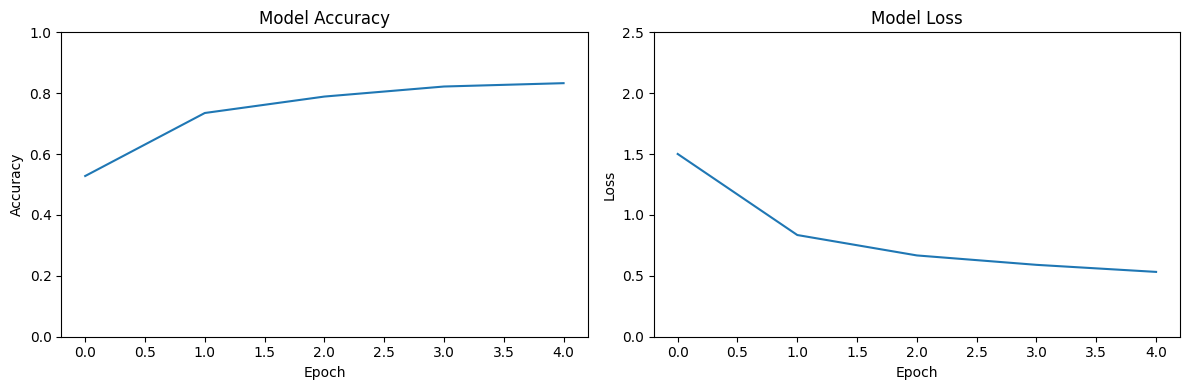

Activation Function: relu
Width: 1
Optimizer: SGD
Skip Connections: True
Batch Normalization: True
Hessian Matrix Shape (Initialization): (8, 8)
Hessian Matrix Shape (After Training): (8, 8)
Activation Function: relu
Width: 2
Optimizer: SGD
Skip Connections: True
Batch Normalization: True
Hessian Matrix Shape (Initialization): (14, 14)
Hessian Matrix Shape (After Training): (14, 14)


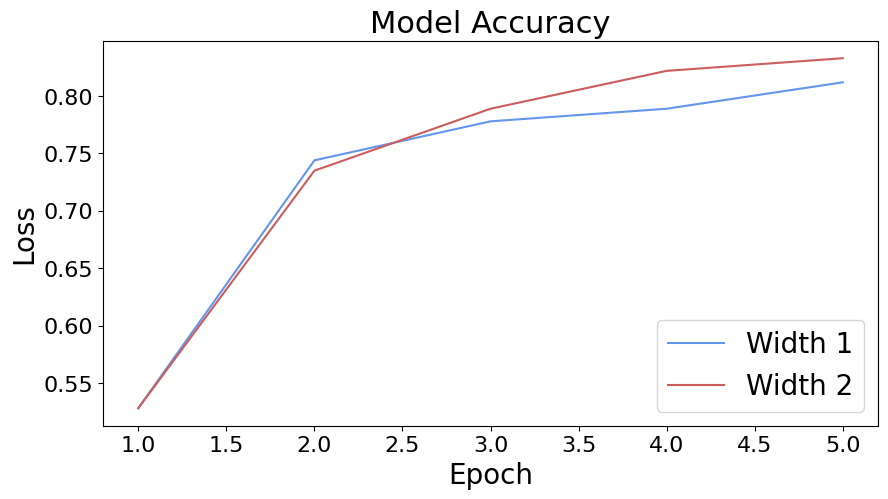

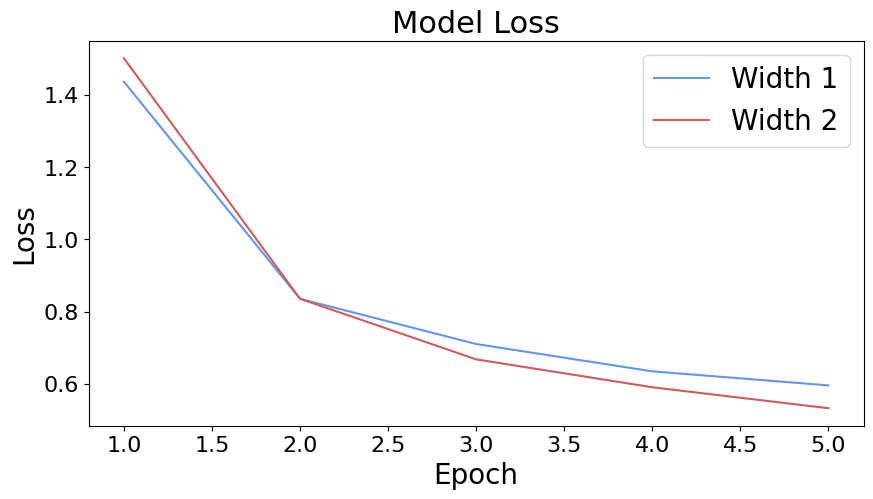

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, initializers, optimizers
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Load Fashion MNIST dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Normalize pixel values to between 0 and 1
train_images = train_images / 255.0

# Flatten the images for simplicity (you might want to use more complex architectures)
train_images = train_images.reshape((60000, 28 * 28))

# Function to build a neural network model with various architectural choices
def build_model(activation_function, width, use_skip_connections, use_batch_norm):
    inputs = tf.keras.Input(shape=(28 * 28,))
    x = inputs

    # Hidden layers
    for _ in range(width):
        if use_batch_norm:
            x = layers.Dense(256, activation=None, kernel_initializer='he_normal')(x)
            x = layers.BatchNormalization()(x)
            x = layers.Activation(activation_function)(x)
        else:
            x = layers.Dense(256, activation=activation_function, kernel_initializer='he_normal')(x)

        if use_skip_connections:
            # Add a projection layer for matching dimensions
            projection = layers.Dense(256, kernel_initializer='he_normal')(inputs)
            x = layers.Add()([x, projection])

    # Output layer
    outputs = layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


# Function to calculate the Hessian matrix
def calculate_hessian(model, data):
    inputs = tf.convert_to_tensor(data['inputs'])
    labels = tf.convert_to_tensor(data['labels'])

    with tf.GradientTape(persistent=True) as tape:
        # Forward pass
        predictions = model(inputs)
        loss = tf.keras.losses.sparse_categorical_crossentropy(labels, predictions)

    # Gradients
    grads = tape.gradient(loss, model.trainable_variables)

    # Hessian matrix
    hessian = []
    for grad1 in grads:
        hess_row = []
        for grad2 in grads:
            hess_row.append(tape.gradient(grad1, grad2))
        hessian.append(hess_row)

    return hessian

import matplotlib.pyplot as plt


def run_experiments(activation_functions, widths, use_skip_connections, use_batch_norm, optimizers, data, epochs=5):
    results = []

    for activation_function in activation_functions:
        for width in widths:
            for optimizer_name, optimizer_class in optimizers.items():
                for skip_connections in use_skip_connections:
                    for batch_norm in use_batch_norm:
                        model = build_model(activation_function, width, skip_connections, batch_norm)

                        # Create an instance of the legacy optimizer
                        optimizer_instance = optimizer_class()

                        # Compile the model
                        model.compile(optimizer=optimizer_instance,
                                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                        # Train the model with history
                        history = model.fit(data['inputs'], data['labels'], epochs=epochs, verbose=0)

                        # Calculate Hessian at initialization
                        hessian_init = calculate_hessian(model, data)

                        # Calculate Hessian after training
                        hessian_train = calculate_hessian(model, data)

                        result = {
                            'activation_function': activation_function.__name__,
                            'width': width,
                            'optimizer': optimizer_name,
                            'skip_connections': skip_connections,
                            'batch_norm': batch_norm,
                            'hessian_init': hessian_init,
                            'hessian_train': hessian_train,
                            'history': history.history  # Store the training history
                        }
                        results.append(result)

                        # # Plot accuracy and loss
                        plt.figure(figsize=(12, 4))
                        plt.subplot(1, 2, 1)
                        plt.plot(history.history['accuracy'])
                        plt.title('Model Accuracy')
                        plt.xlabel('Epoch')
                        plt.ylabel('Accuracy')
                        plt.ylim([0, 1])

                        plt.subplot(1, 2, 2)
                        plt.plot(history.history['loss'])
                        plt.title('Model Loss')
                        plt.xlabel('Epoch')
                        plt.ylabel('Loss')
                        plt.ylim([0, 2.5])

                        plt.tight_layout()
                        plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range(1,len(results[0]['history']['accuracy'])+1), results[0]['history']['accuracy'], '-', color='cornflowerblue')
    plt.plot(range(1,len(results[1]['history']['accuracy'])+1), results[1]['history']['accuracy'], '-', color='indianred')
    plt.title('Model Accuracy', fontsize=22)
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.legend(['Width 1', 'Width 2'], fontsize=20, loc = 'lower right')
    plt.tick_params(axis='both', labelsize=16)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1,len(results[0]['history']['loss'])+1), results[0]['history']['loss'], '-', color='cornflowerblue')
    plt.plot(range(1,len(results[1]['history']['loss'])+1), results[1]['history']['loss'], '-', color='indianred')
    plt.title('Model Loss', fontsize=22)
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.legend(['Width 1', 'Width 2'], fontsize=20)
    plt.tick_params(axis='both', labelsize=16)

    return results


# Prepare data for the experiment
data = {'inputs': train_images[:1000], 'labels': train_labels[:1000]}

# Define activation functions, widths, and optimizers for experiments
#activation_functions = [tf.keras.activations.relu, tf.keras.activations.sigmoid, tf.keras.activations.tanh]
activation_functions = [tf.keras.activations.relu]
widths = [1, 2]  # Vary the width of the network
use_skip_connections = [True]
#use_skip_connections = [False, True]
#use_batch_norm = [False, True]
use_batch_norm = [True]
#optimizers = {
#    'Adam': tf.keras.optimizers.Adam,
#    'SGD': tf.keras.optimizers.SGD,
#    'RMSprop': tf.keras.optimizers.RMSprop
#}
optimizers = {
    'SGD': tf.keras.optimizers.SGD
}

# Run experiments
experiment_results = run_experiments(activation_functions, widths, use_skip_connections, use_batch_norm, optimizers, data)

# Print or further analyze the results
for result in experiment_results:
    print(f"Activation Function: {result['activation_function']}")
    print(f"Width: {result['width']}")
    print(f"Optimizer: {result['optimizer']}")
    print(f"Skip Connections: {result['skip_connections']}")
    print(f"Batch Normalization: {result['batch_norm']}")
    print(f"Hessian Matrix Shape (Initialization): {np.shape(result['hessian_init'])}")
    print(f"Hessian Matrix Shape (After Training): {np.shape(result['hessian_train'])}")
    print("="*50)
